### Exploratory Data Analysis

1. Handle missing values
2. Understand all the Numerical Variables
3. Understand the ditribution of all numerical variables
4. Handle categorical variables with make_dummy
5. Cardinality of categorical variables
6. find the outliers
7. find out the relationship between indpt and dependent features (resale_price)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('./datasets/train.csv')

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_88217/2919597480.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/train.csv')


In [4]:
print(df.shape)

(150634, 78)


In [35]:
# display all 70 columns
pd.set_option('display.max_columns', None)
df.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  price_per_sqft  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760      701.928238   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320      475.230826   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016      540.639580   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692      496.080066   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412      333.552717   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       15             25            2005           Y          N   
1       34              9            1987           Y          N   
2       24             16            1996           Y          N   
3       29             11            1990           Y          Y   
4       34              4            1987           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   142   
1             N                   N                 N                   112   
2             N                   N                 N                    90   
3             N                   N                 N                    75   
4             N                   N                 N                    48   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          96          46          0   
1           0           0           0          56          56          0   
2           0           0           0           0          30         60   
3           0           0           0          68           7          0   
4           0           0           0          30          18          0   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   
1              0                      0             0             0   
2              0                      0             0             0   
3              0                      0             0             0   
4              0                      0             0             0   

   3room_rental  other_room_rental  postal  Latitude   Longitude  \
0             0                  0  382003  1.314299  103.872828   
1             0                  0  570153  1.346086  103.855078   
2             0                  0  651289  1.343867  103.760535   
3             0                  0  570232  1.358245  103.845504   
4             0                  0  760876  1.414745  103.835532   

  

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [37]:
# find out the features with missing values
pd.set_option('display.max_rows', None)
df.isnull().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft                   0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion   

#### Missing Values

In [8]:
# check out percentage of null values for each feature with missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

Mall_Nearest_Distance 0.0055 % missing values
Mall_Within_500m 0.616 % missing values
Mall_Within_1km 0.1688 % missing values
Mall_Within_2km 0.0129 % missing values
Hawker_Within_500m 0.6465 % missing values
Hawker_Within_1km 0.4041 % missing values
Hawker_Within_2km 0.1939 % missing values


It looks like the values with the highest percentages are Mall_within_500m and Hawker_Within_500m

Since there are some missing values, we will examine if the missing values have any relationship with y value (resale price)

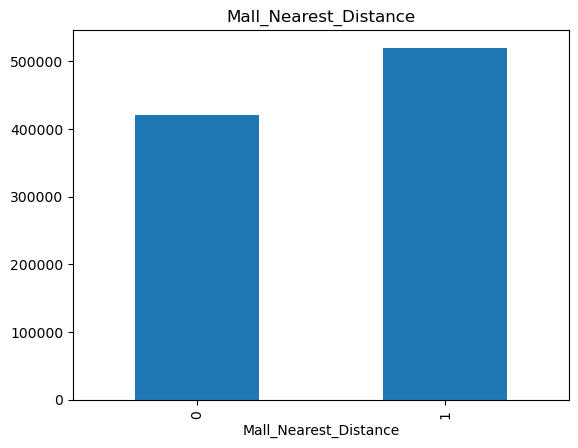

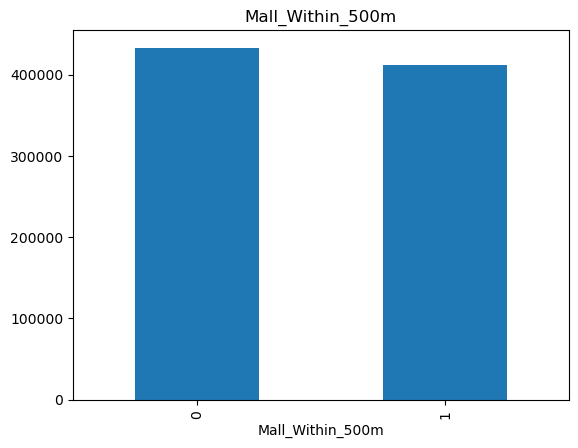

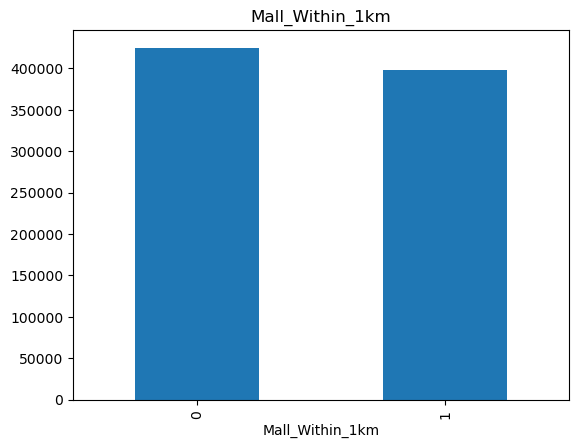

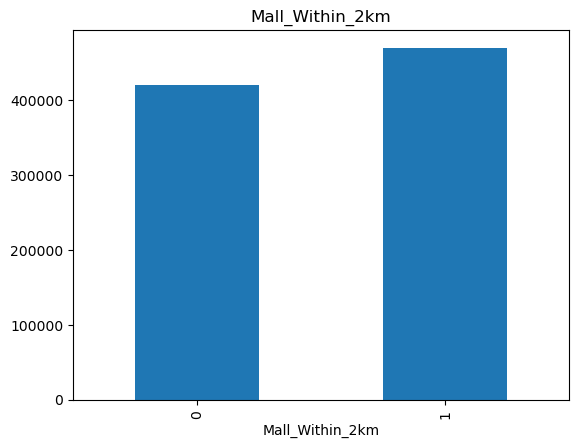

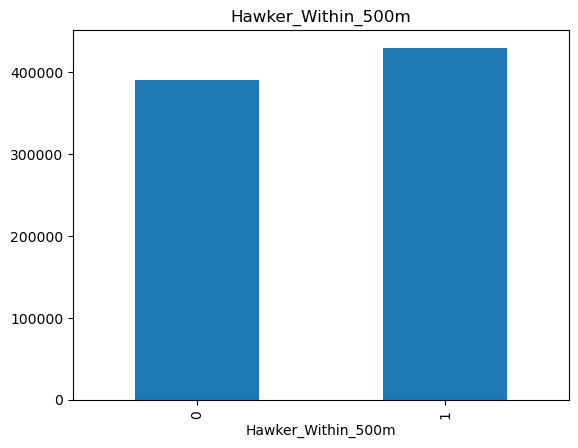

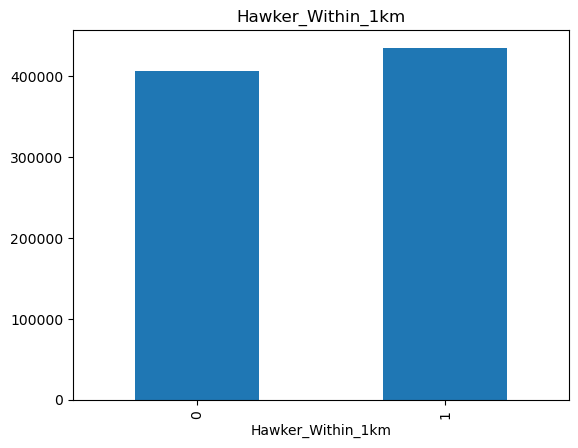

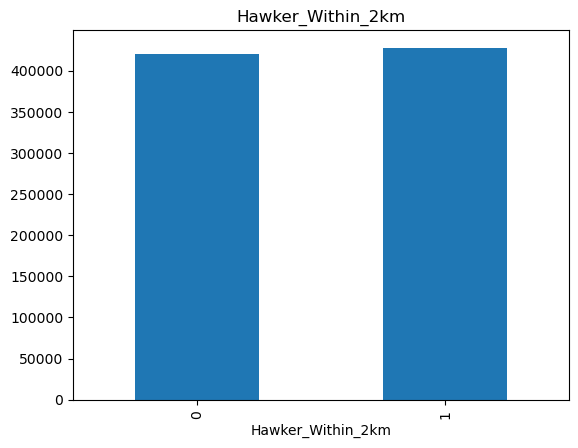

In [31]:
for feature in features_with_na:
    data = df.copy() # make a dataset copy
    
    # make variable that indicates 1 if observation was missing 
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # if there are a lot of missing values, whether the sales price will increase
    
    data.groupby(feature)['resale_price'].median().plot.bar()
    plt.title(feature)
    plt.show()

* The relationship between the missing values and dependent variables is clearly visible (except for the variable Hawker_Within_2km). 
* We will need to replace the missing values with something meaningful. 
* We will be handling this in the Feature Engineering section

### Numerical Variables

In [32]:
# find out the number of variables which are numerical
numerical_features = [features for features in df.columns if df[features].dtype != 'O']

In [33]:
print('Number of numerical variables: ', len(numerical_features))
pd.set_option('display.max_columns', None)
df[numerical_features].head()

Number of numerical variables:  58


id  floor_area_sqm  lease_commence_date  resale_price  Tranc_Year  \
0   88471            90.0                 2006      680000.0        2016   
1  122598           130.0                 1987      665000.0        2012   
2  170897           144.0                 1997      838000.0        2013   
3   86070           103.0                 1992      550000.0        2012   
4  153632            83.0                 1987      298000.0        2017   

   Tranc_Month  mid_storey  lower  upper  mid  floor_area_sqft  \
0            5          11     10     12   11          968.760   
1            7           8      7      9    8         1399.320   
2            7          14     13     15   14         1550.016   
3            4           3      1      5    3         1108.692   
4           12           2      1      3    2          893.412   

   price_per_sqft  hdb_age  max_floor_lvl  year_completed  \
0      701.928238       15             25            2005   
1      475.230826       34              9            1987   
2      540.639580       24             16            1996   
3      496.080066       29             11            1990   
4      333.552717       34              4            1987   

   total_dwelling_units  1room_sold  2room_sold  3room_sold  4room_sold  \
0                   142           0           0           0          96   
1                   112           0           0           0          56   
2                    90           0           0           0           0   
3                    75           0           0           0          68   
4                    48           0           0           0          30   

   5room_sold  exec_sold  multigen_sold  studio_apartment_sold  1room_rental  \
0          46          0              0                      0             0   
1          56          0              0                      0             0   
2          30         60              0                      0             0   
3           7          0              0                      0             0   
4          18          0              0                      0             0   

   2room_rental  3room_rental  other_room_rental  Latitude   Longitude  \
0             0             0                  0  1.314299  103.872828   
1             0             0                  0  1.346086  103.855078   
2             0             0                  0  1.343867  103.760535   
3             0             0                  0  1.358245  103.845504   
4             0             0                  0  1.414745  103.835532   

   Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  Mall_Within_2km  \
0            1094.090418               NaN              NaN              7.0   
1             866.941448               NaN              1.0              3.0   
2            1459.579948               NaN              NaN              4.0   
3             950.175199               NaN              1.0              4.0   
4             729.771895               NaN              1.0              2.0   

   Hawker_Nearest_Distance  Hawker_Within_500m  Hawker_Within_1km  \
0               154.753357                 1.0                3.0   
1               640.151925                 NaN                1.0   
2              1762.082341                 NaN                NaN   
3               726.215262                 NaN                1.0   
4              1540.151439                 NaN                NaN   

   Hawker_Within_2km  hawker_food_stalls  hawker_market_stalls  \
0               13.0                  84                    60   
1                7.0                  80                    77   
2                1.0                  84                    95   
3                9.0                  32                    86   
4                1.0                  45                     0   

   mrt_nearest_distance  bus_interchange  mrt_interchange  mrt_latitude  \
0            330.083069                0 

**Temporal Variables (Datetime)**
* From the dataset we have 5 temporal variables: Tranc_YearMonth, lease_commence_date, Tranc_Year, Tranc_Month, year_completed.
* This information is useful when we can extract information such as the difference in years between the year of the house was built and the year that the house was sold
* We can perform this analysis during the Feature Engineering section later

In [34]:
# explore the temporal variables
temporal_features = ['Tranc_YearMonth', 'lease_commence_date', 'Tranc_Year', 'Tranc_Month', 'year_completed']

for feature in temporal_features:
    print(feature, df[feature].unique())

Tranc_YearMonth ['2016-05' '2012-07' '2013-07' '2012-04' '2017-12' '2013-01' '2018-05'
 '2012-03' '2020-01' '2014-06' '2013-06' '2018-03' '2017-07' '2015-08'
 '2019-10' '2018-01' '2020-11' '2015-12' '2017-08' '2015-07' '2019-04'
 '2019-08' '2020-06' '2020-07' '2017-09' '2016-03' '2012-11' '2012-12'
 '2018-11' '2013-04' '2020-12' '2019-03' '2017-04' '2016-12' '2021-04'
 '2012-10' '2014-07' '2018-04' '2017-01' '2015-04' '2012-06' '2013-08'
 '2019-07' '2017-02' '2020-08' '2017-10' '2020-10' '2015-01' '2020-02'
 '2019-01' '2019-09' '2016-06' '2016-08' '2018-12' '2018-07' '2015-03'
 '2012-05' '2014-04' '2014-09' '2014-12' '2015-09' '2017-11' '2020-03'
 '2015-06' '2012-09' '2014-11' '2014-05' '2021-01' '2012-08' '2016-04'
 '2013-05' '2016-02' '2016-01' '2018-02' '2014-10' '2021-02' '2017-06'
 '2014-03' '2018-06' '2019-02' '2020-04' '2021-03' '2016-09' '2019-11'
 '2016-11' '2015-02' '2018-08' '2013-10' '2019-06' '2017-03' '2020-09'
 '2013-11' '2013-03' '2016-07' '2014-08' '2019-12' '2018-10' 

Text(0.5, 1.0, 'Resale Price vs Year Sold')

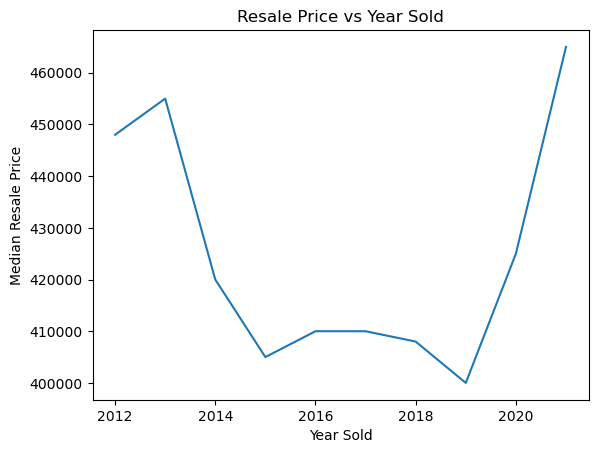

In [35]:
# understand the r/s between year and transaction price

df.groupby('Tranc_Year')['resale_price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median Resale Price')
plt.title('Resale Price vs Year Sold')

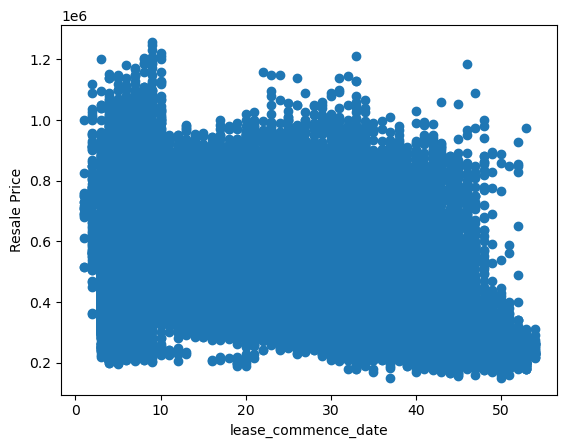

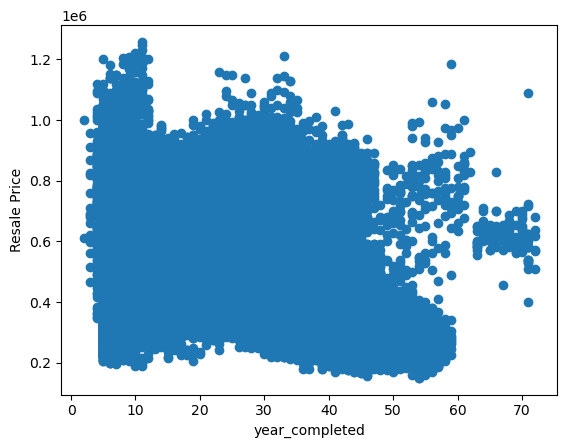

In [36]:
# compared with all features with resale price
year_features=['lease_commence_date', 'Tranc_Year', 'year_completed']

# get the difference between the year varialble, and the year the house was sold
for feature in year_features:
    if feature != 'Tranc_Year':
        data = df.copy()
        data[feature] = data['Tranc_Year']-data[feature]
        
        plt.scatter(data[feature], data['resale_price'])
        plt.xlabel(feature)
        plt.ylabel('Resale Price')
        plt.show()

# lease_commence_date is the commencement year of the flat unit's 99-year lease
# this means the the later the lease_commence_date, the newer the flat is 

In [39]:
# Discrete and Continuous Variables

# assume that discrete var has lesser unique values
discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_features + ['id']]
print('Discrte Variables Count:{}'.format(len(discrete_feature)))

Discrte Variables Count:19


In [40]:
discrete_feature

['Tranc_Month',
 'mid_storey',
 'lower',
 'upper',
 'mid',
 '1room_sold',
 'multigen_sold',
 '1room_rental',
 '3room_rental',
 'other_room_rental',
 'Mall_Within_500m',
 'Mall_Within_1km',
 'Hawker_Within_500m',
 'Hawker_Within_1km',
 'Hawker_Within_2km',
 'bus_interchange',
 'mrt_interchange',
 'pri_sch_affiliation',
 'affiliation']

In [44]:
df[discrete_feature].head()

Tranc_Month  mid_storey  lower  upper  mid  1room_sold  multigen_sold  \
0            5          11     10     12   11           0              0   
1            7           8      7      9    8           0              0   
2            7          14     13     15   14           0              0   
3            4           3      1      5    3           0              0   
4           12           2      1      3    2           0              0   

   1room_rental  3room_rental  other_room_rental  Mall_Within_500m  \
0             0             0                  0               NaN   
1             0             0                  0               NaN   
2             0             0                  0               NaN   
3             0             0                  0               NaN   
4             0             0                  0               NaN   

   Mall_Within_1km  Hawker_Within_500m  Hawker_Within_1km  Hawker_Within_2km  \
0              NaN                 1.0                3.0               13.0   
1              1.0                 NaN                1.0                7.0   
2              NaN                 NaN                NaN                1.0   
3              1.0                 NaN                1.0                9.0   
4              1.0                 NaN                NaN                1.0   

   bus_interchange  mrt_interchange  pri_sch_affiliation  affiliation  
0                0                0                    1            0  
1                1                1                    1            0  
2                1                0                    0            0  
3                1                1                    1            1  
4                0                0                    0            0

Tranc_Month


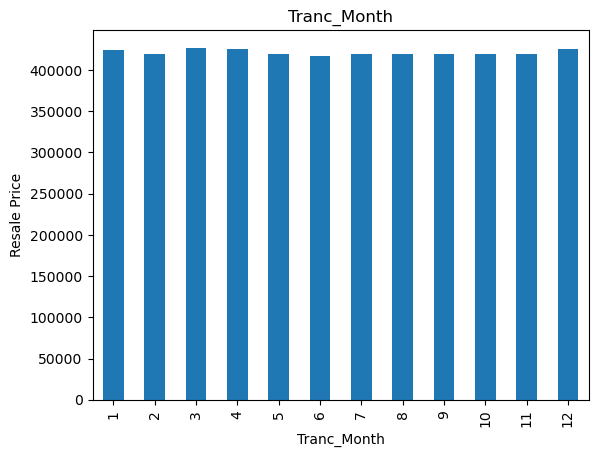

mid_storey


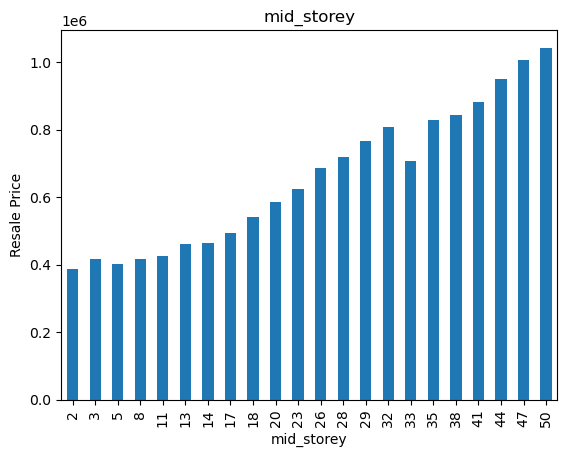

lower


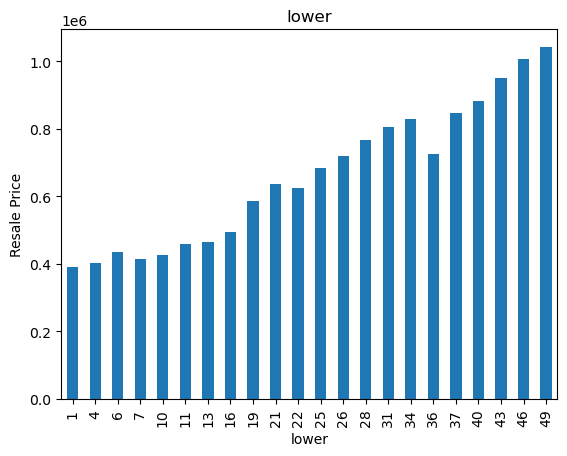

upper


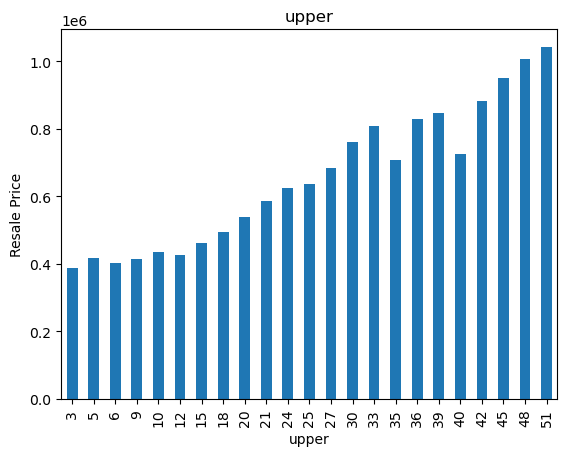

mid


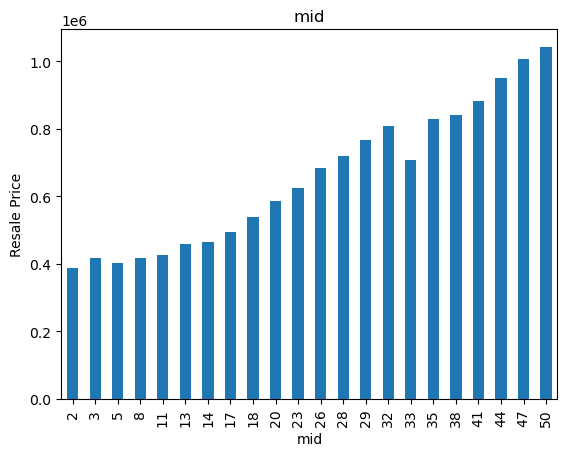

1room_sold


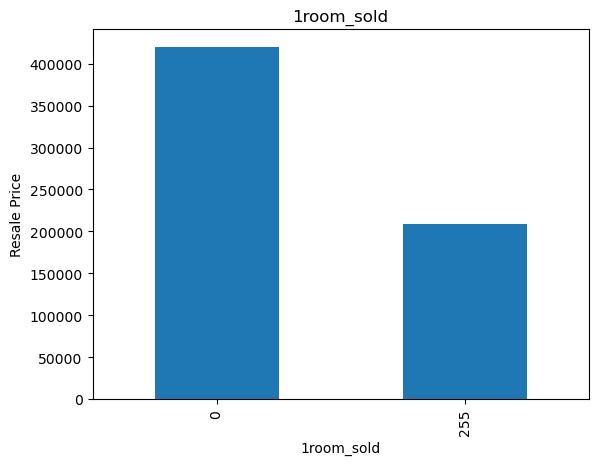

multigen_sold


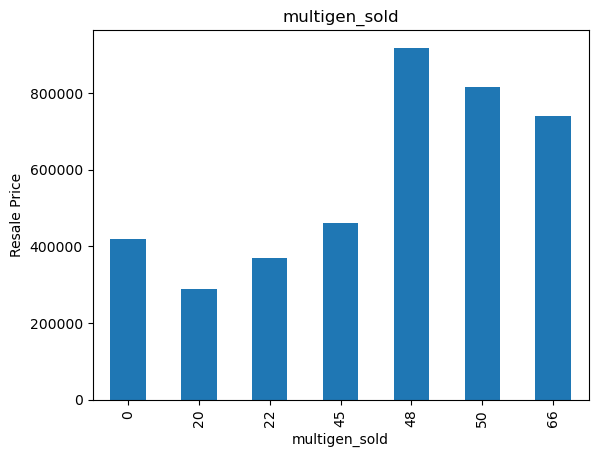

1room_rental


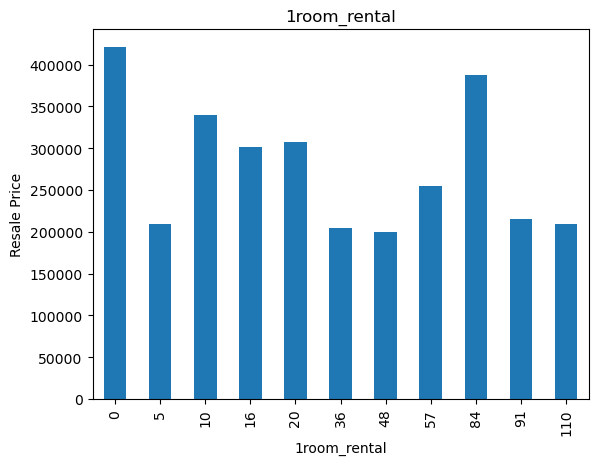

3room_rental


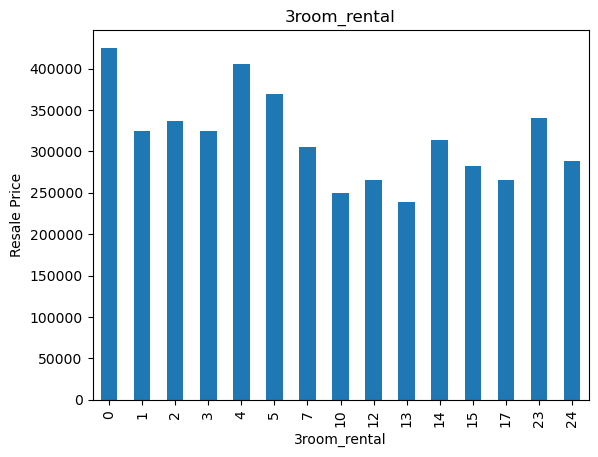

other_room_rental


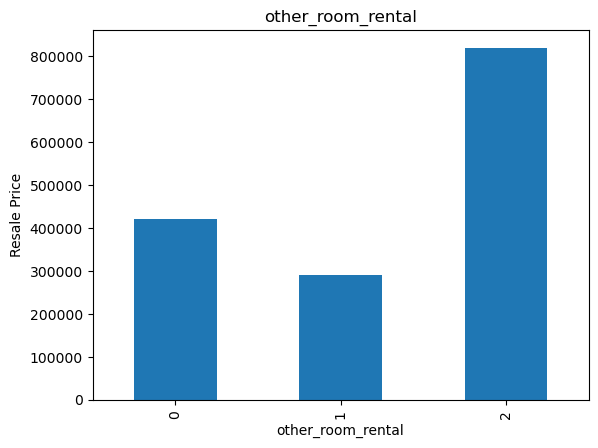

Mall_Within_500m


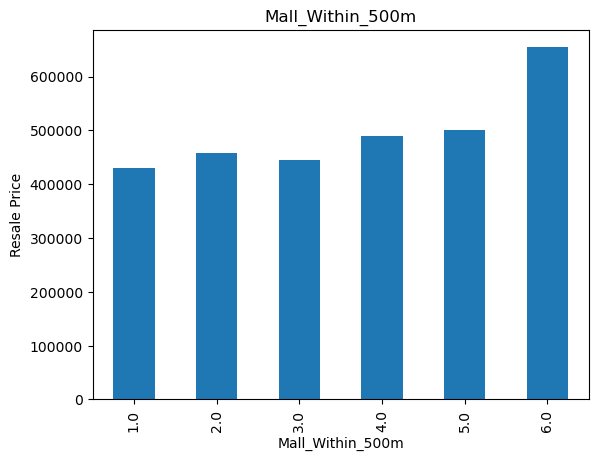

Mall_Within_1km


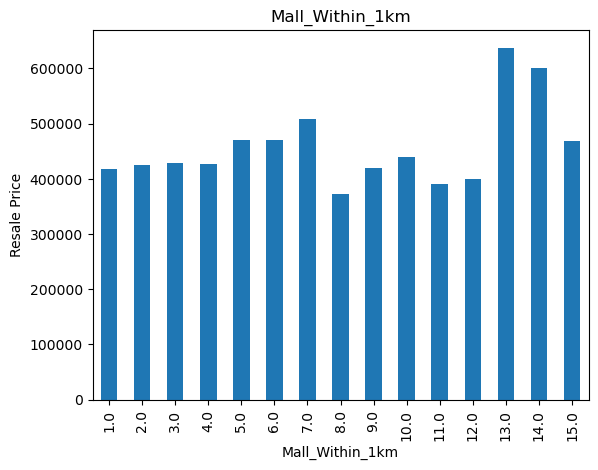

Hawker_Within_500m


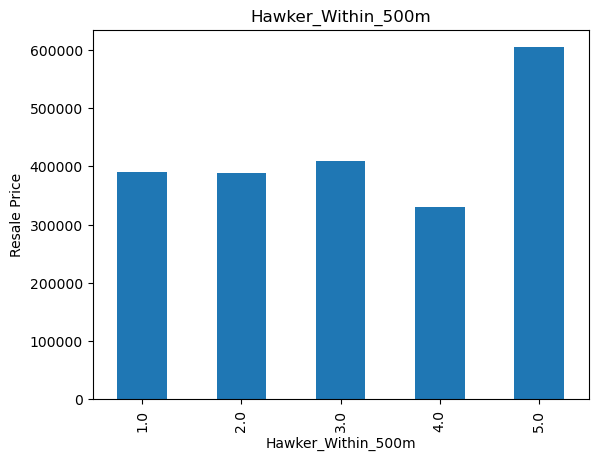

Hawker_Within_1km


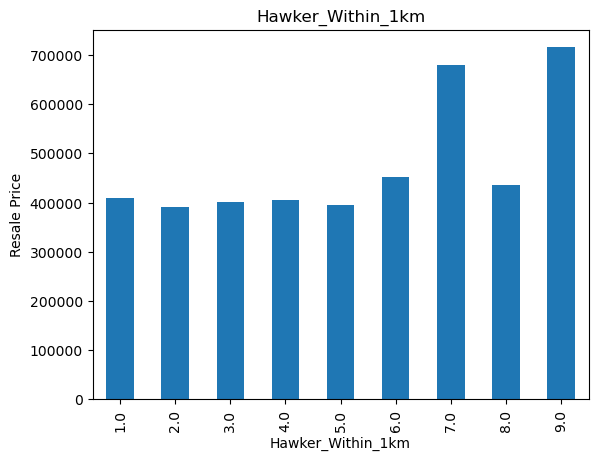

Hawker_Within_2km


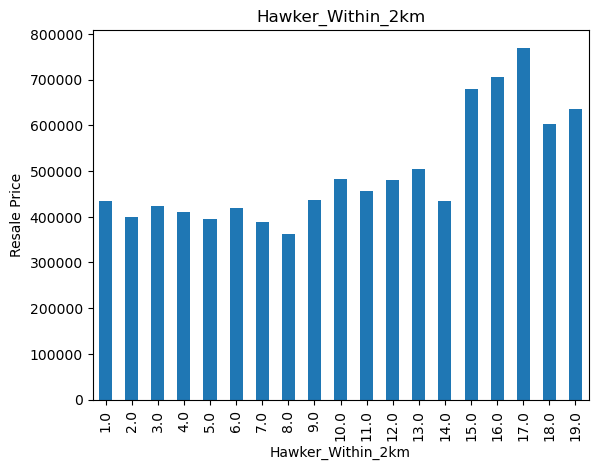

bus_interchange


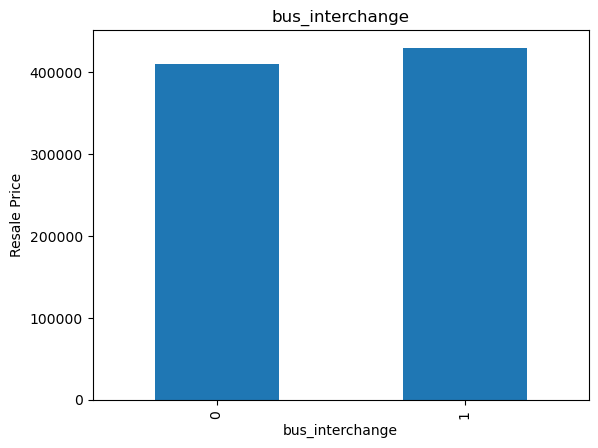

mrt_interchange


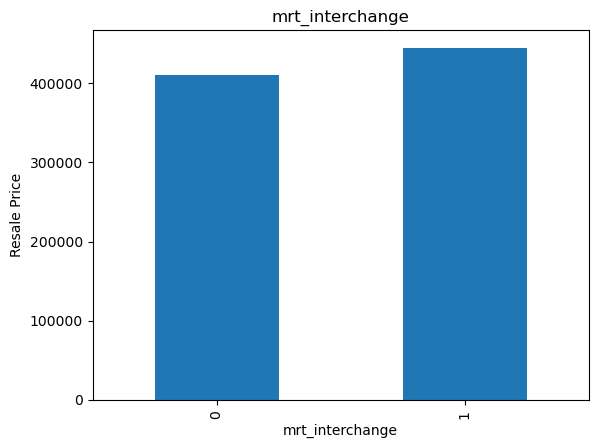

pri_sch_affiliation


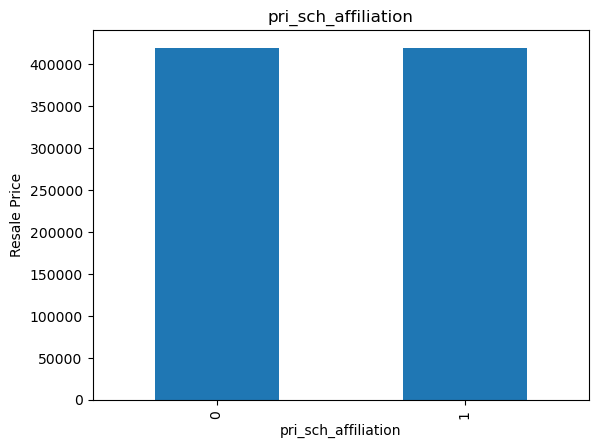

affiliation


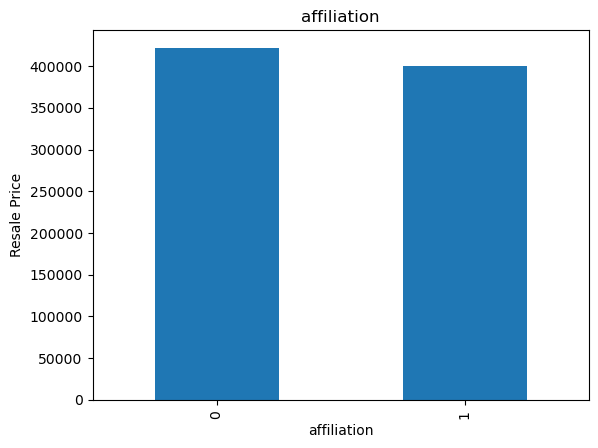

In [52]:
# find out the relationship between the 19 discrete variables and resale price
for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['resale_price'].median().plot.bar()
    print (feature)
    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.title(feature)
    plt.show()

In [ ]:
# there seem to be a relationship between discrete variables and resale price

In [54]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_features + ['id']]
print('Continuous Variables Count:{}'.format(len(continuous_feature)))

Continuous Variables Count:35


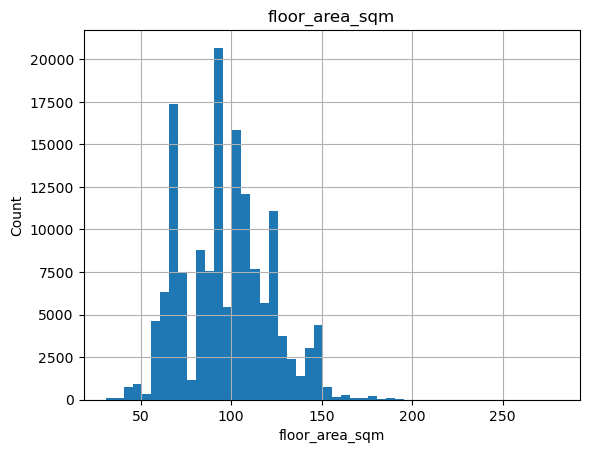

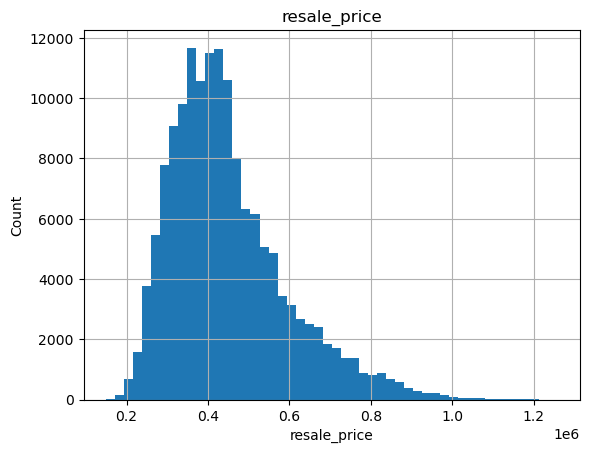

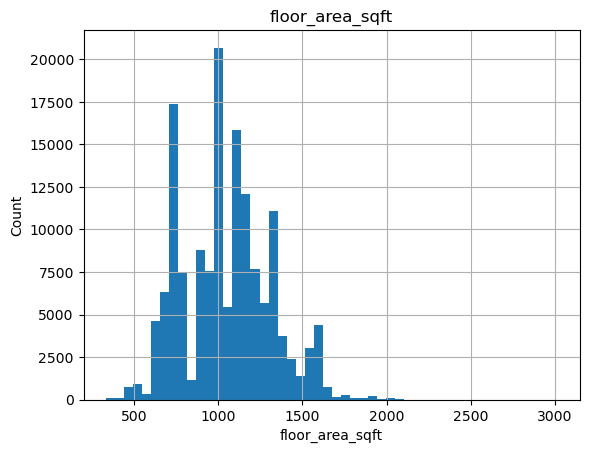

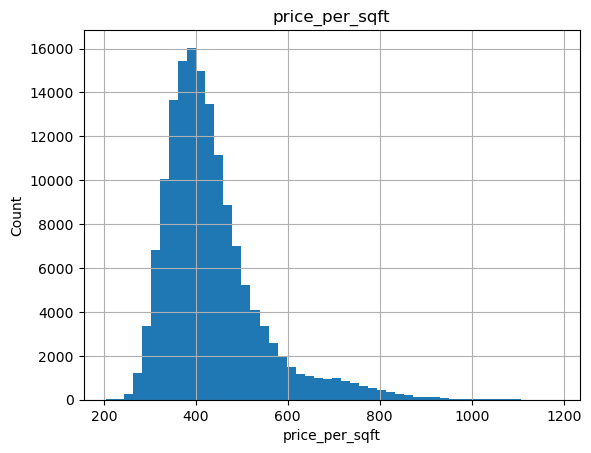

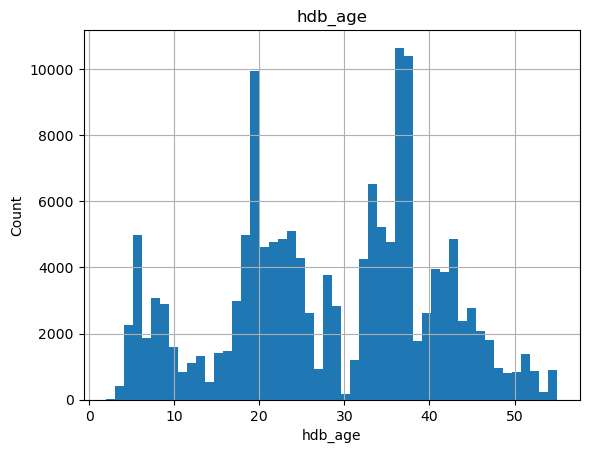

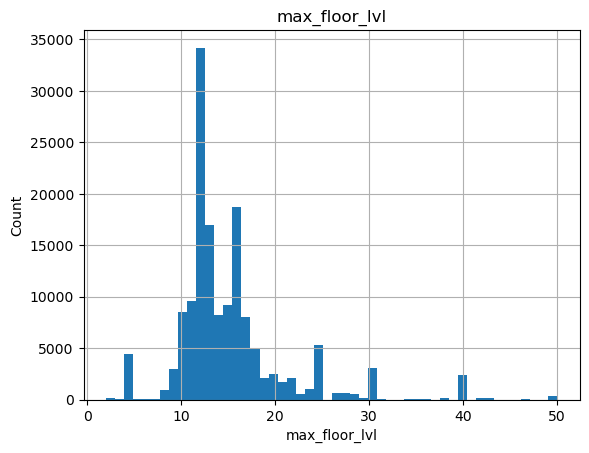

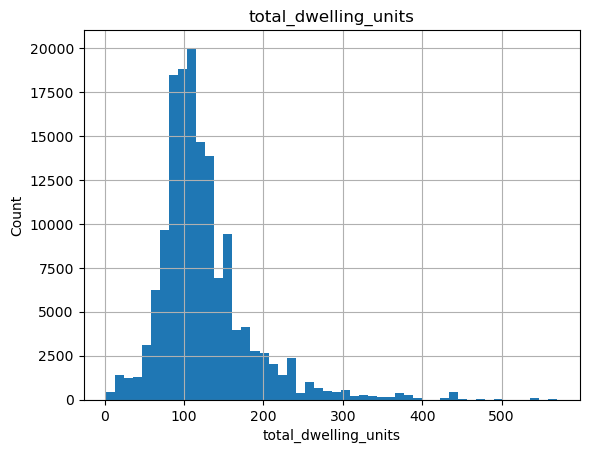

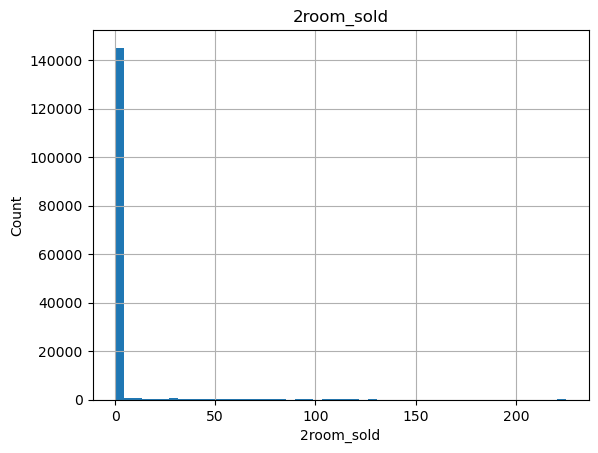

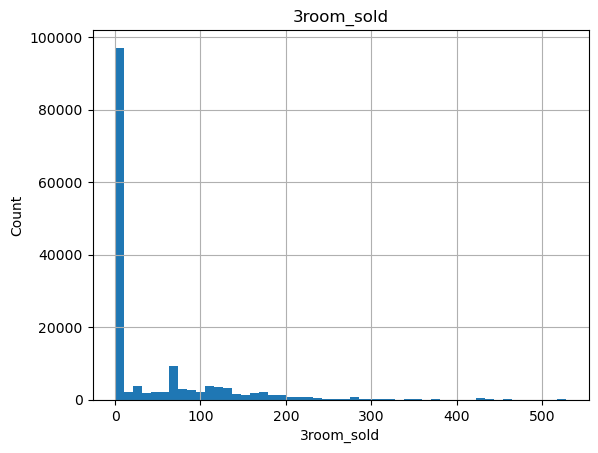

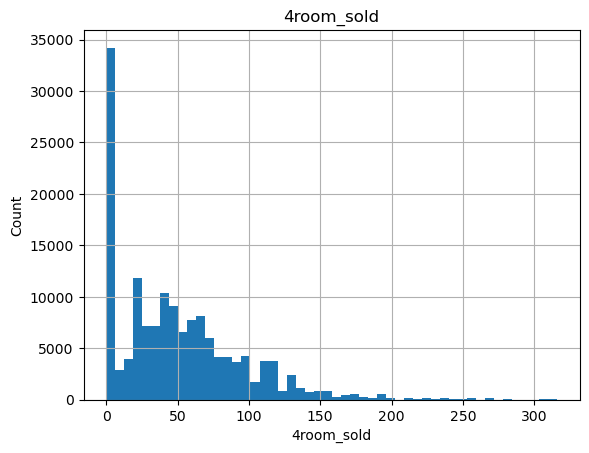

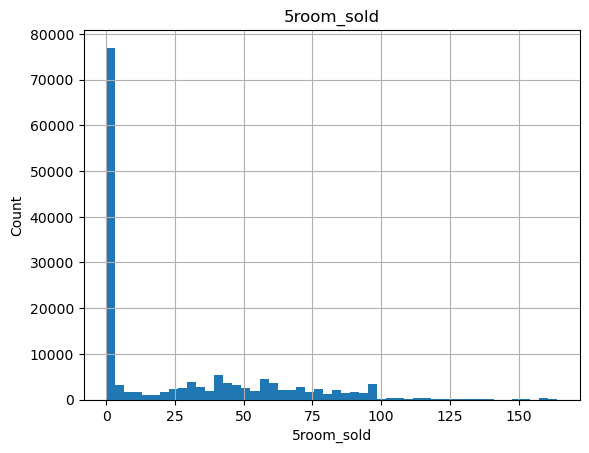

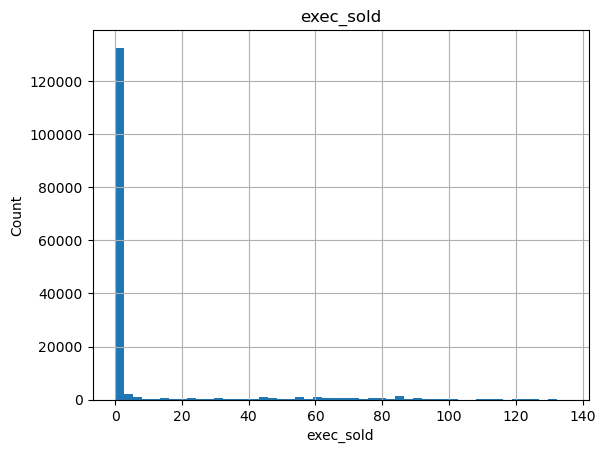

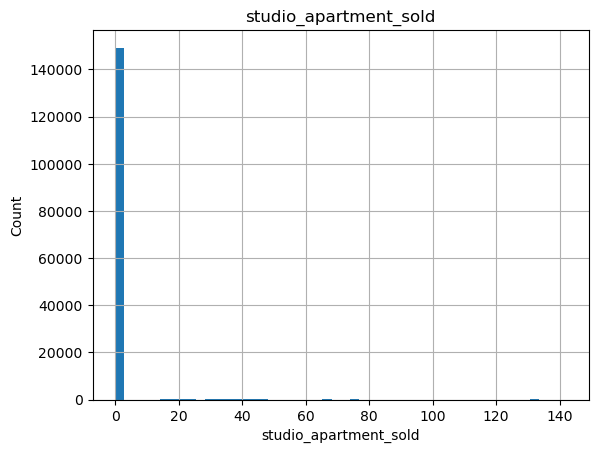

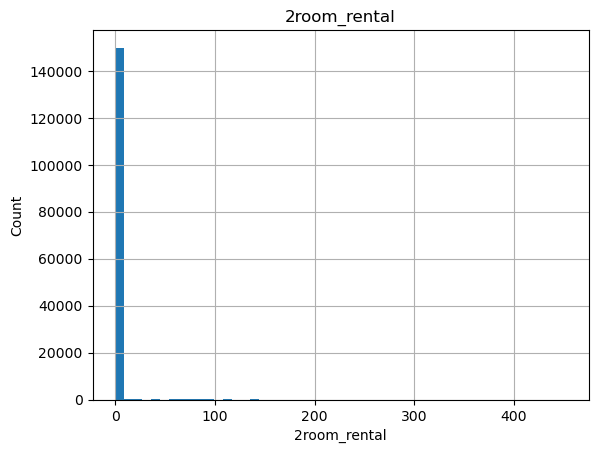

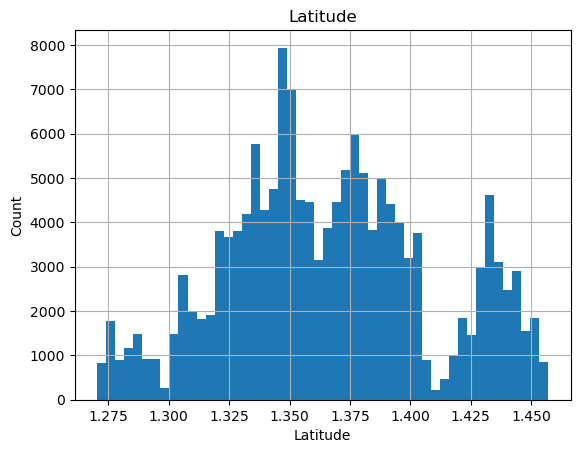

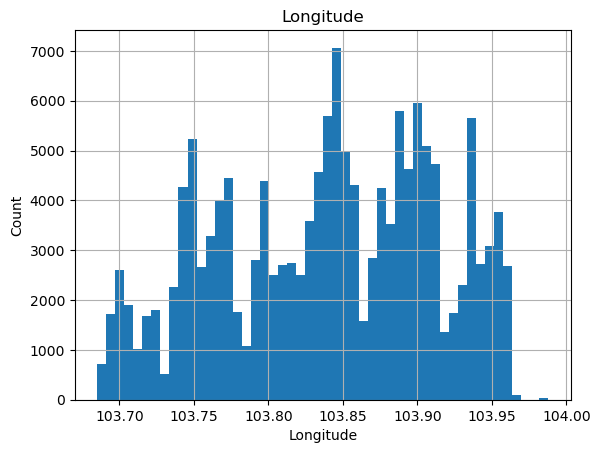

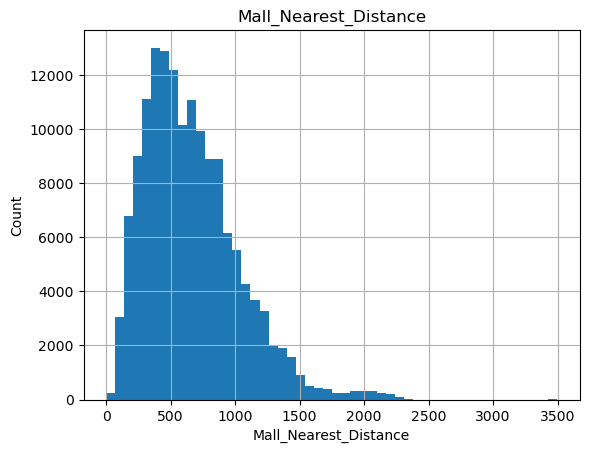

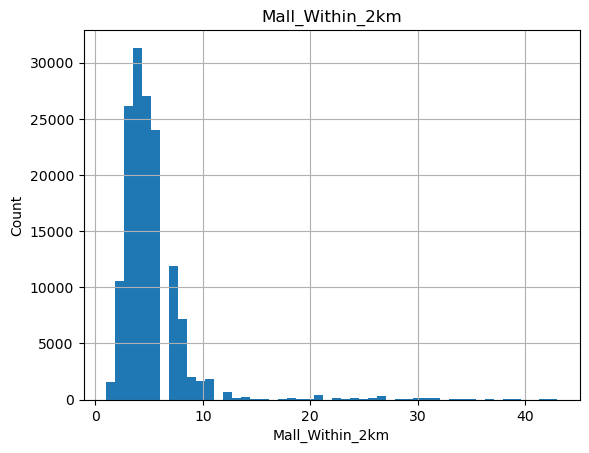

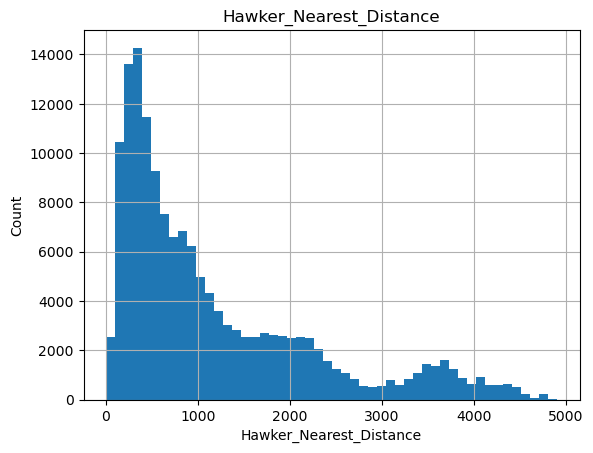

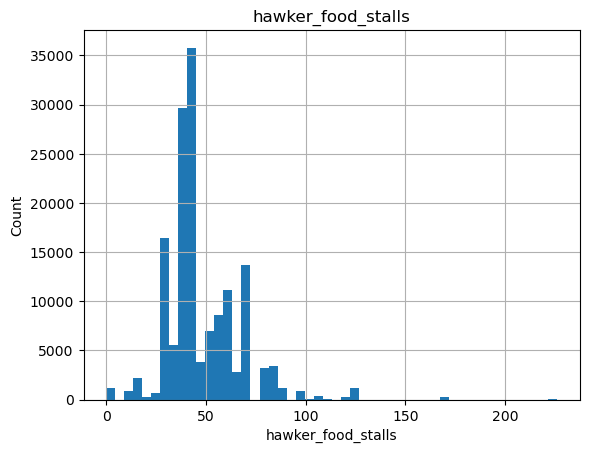

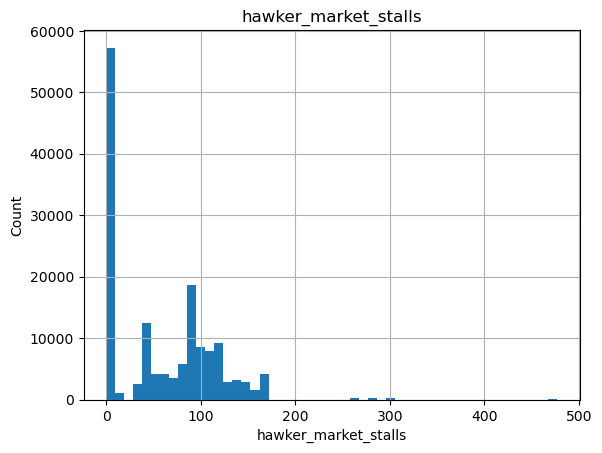

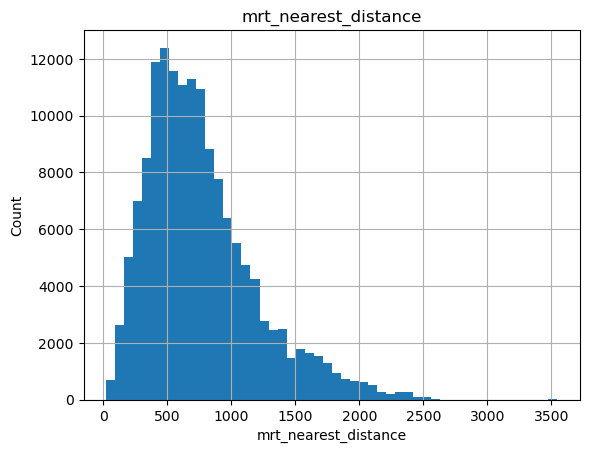

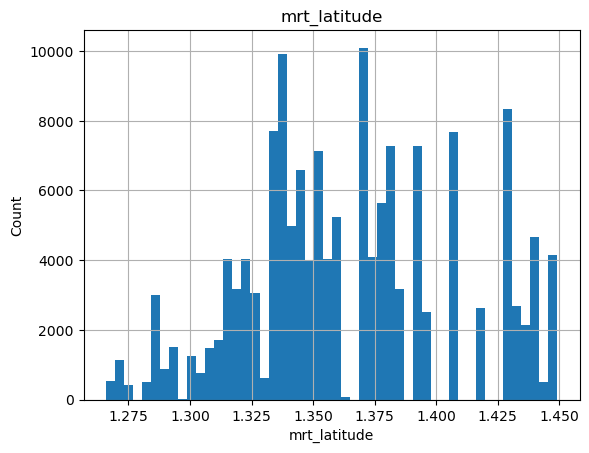

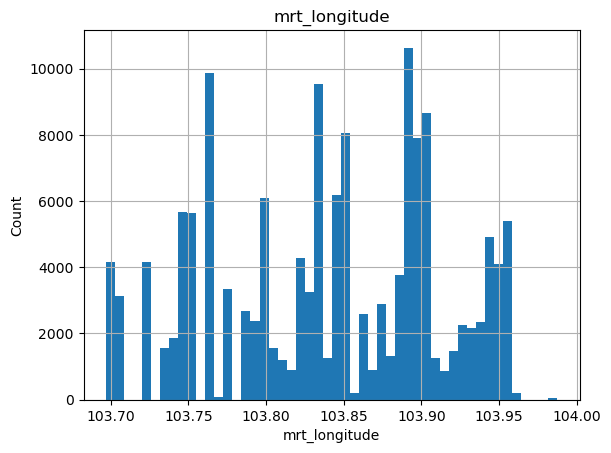

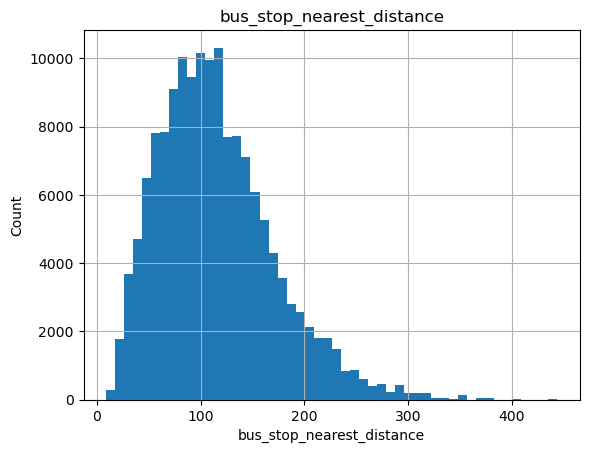

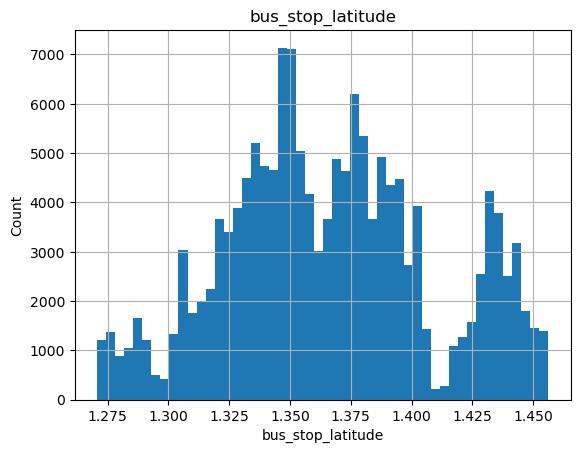

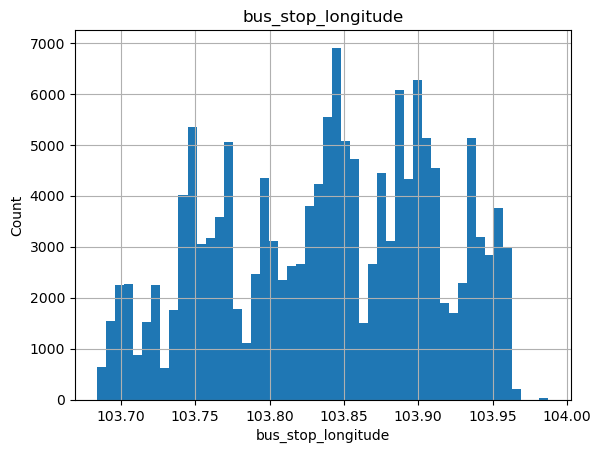

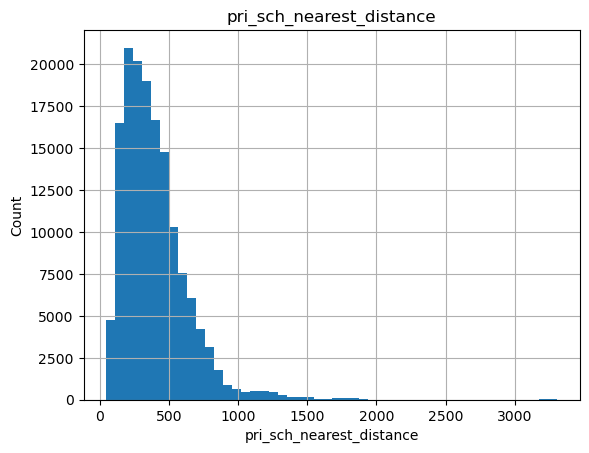

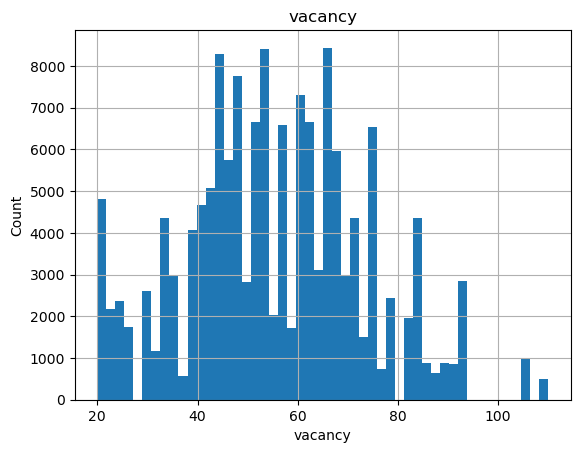

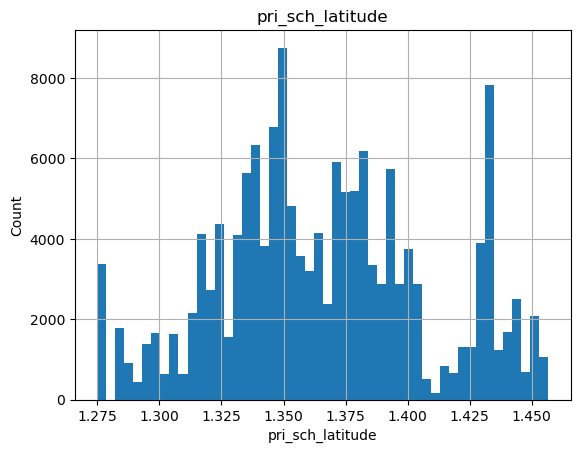

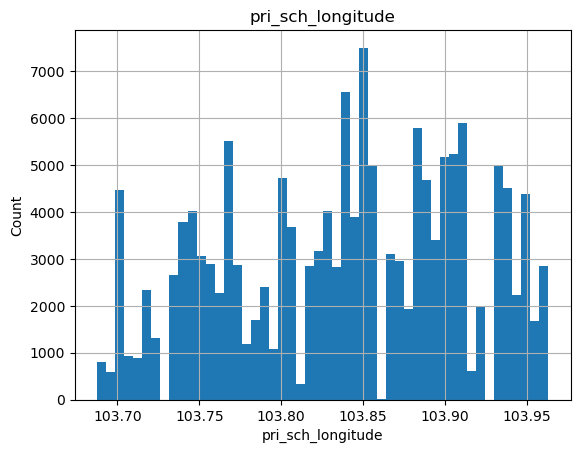

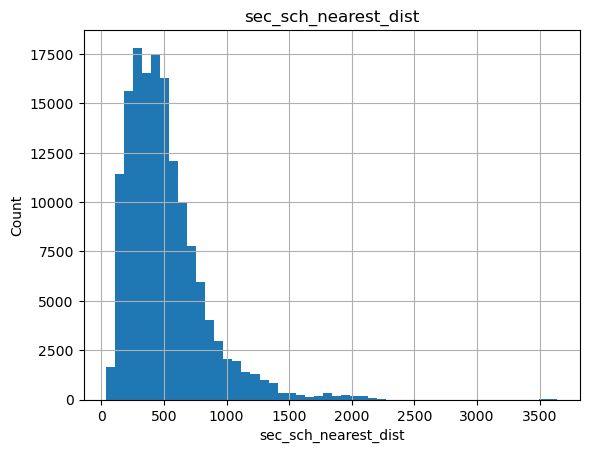

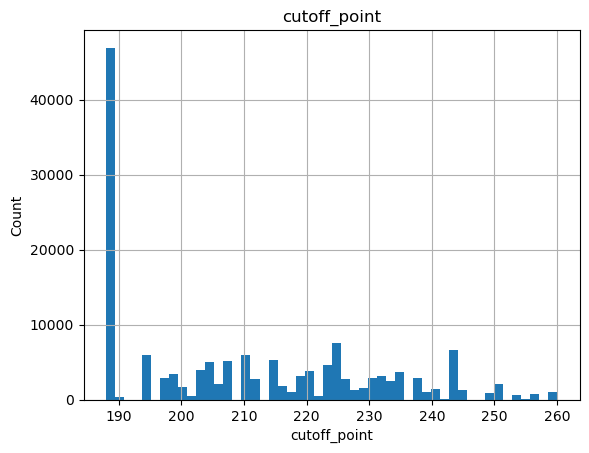

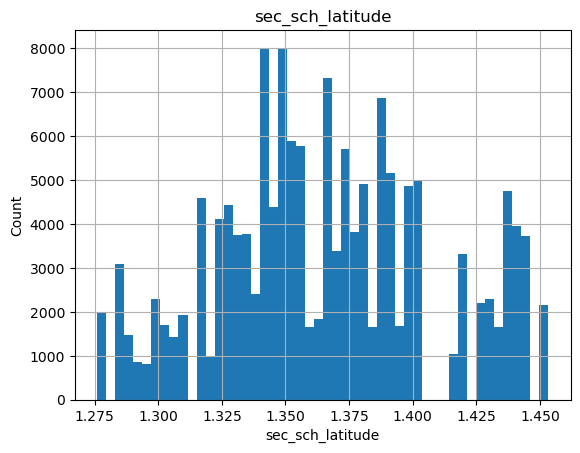

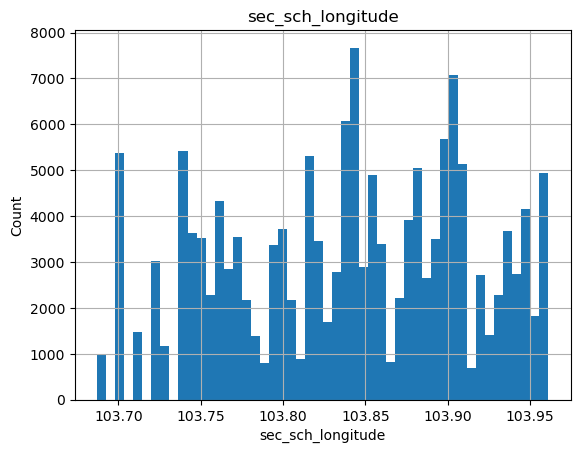

In [56]:
# creates a histogram of the continuous features to understand its distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [ ]:
# we will convert the distribution of non-normal distribution into a normal distributions

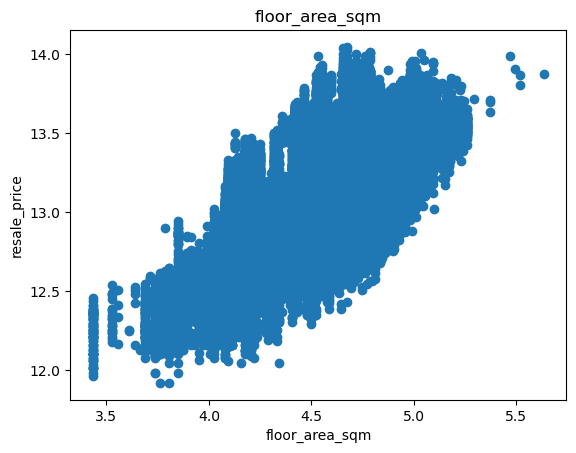

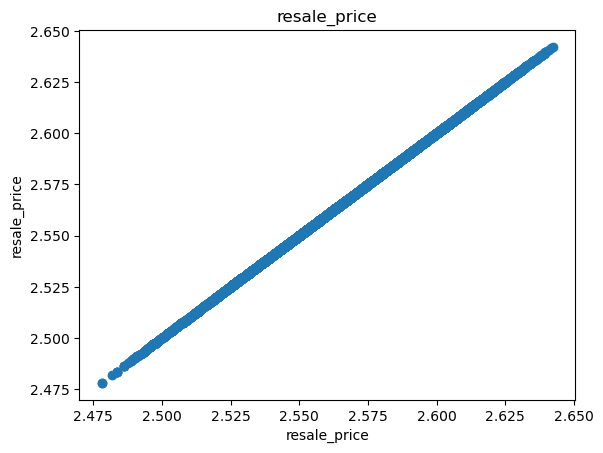

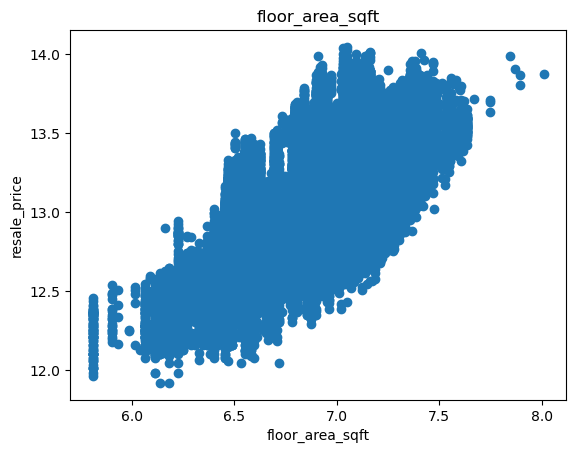

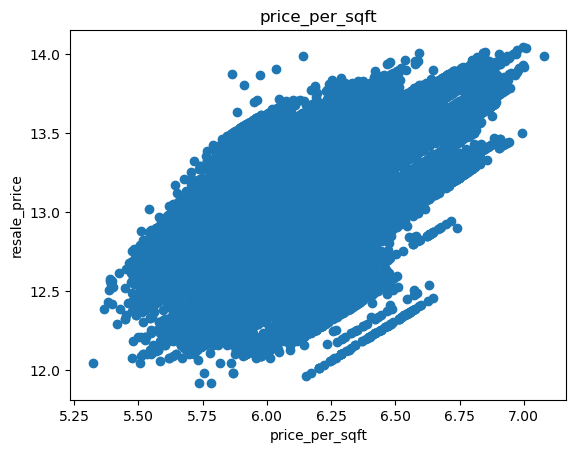

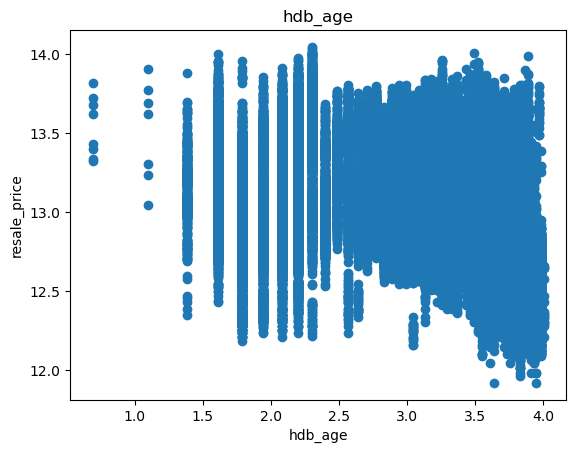

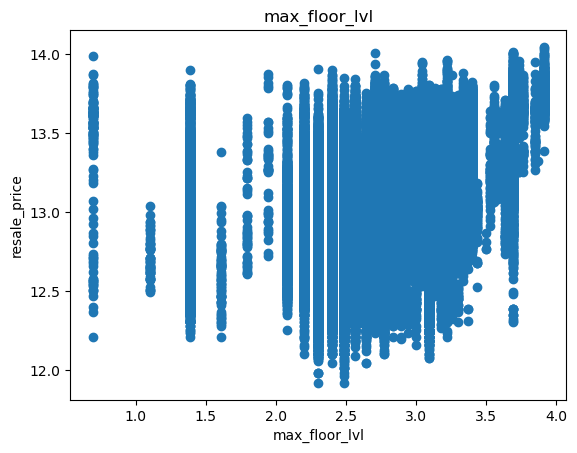

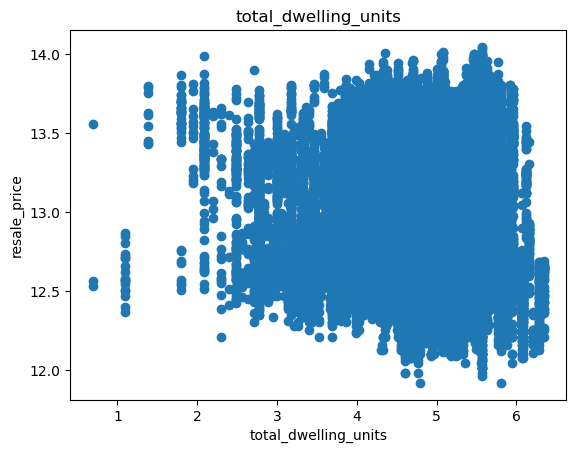

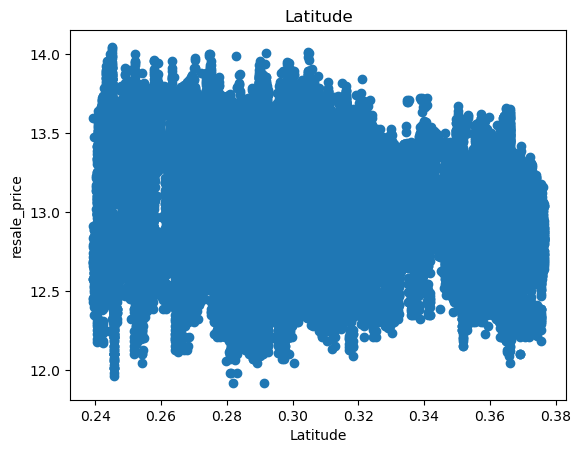

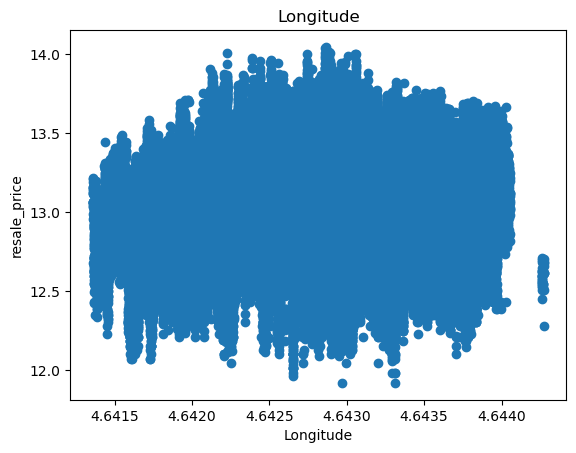

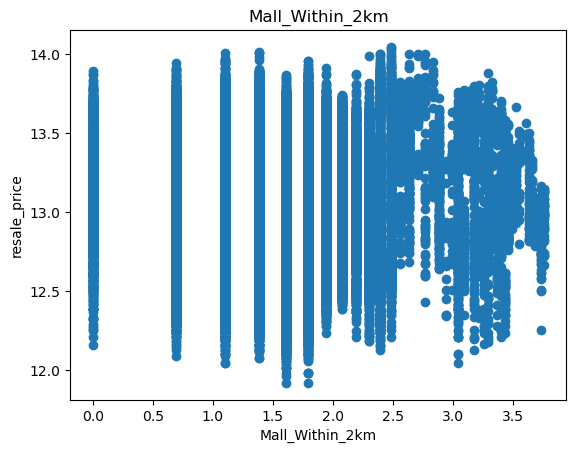

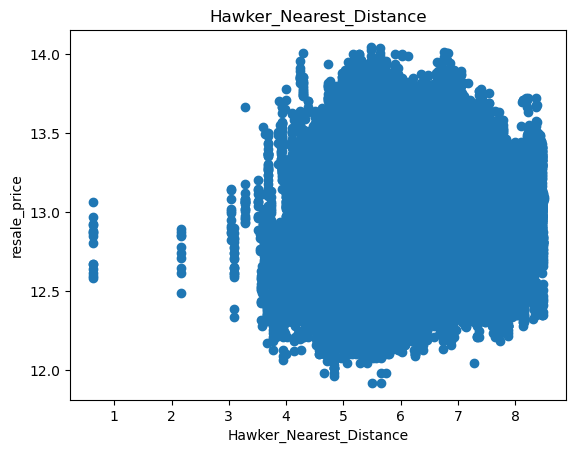

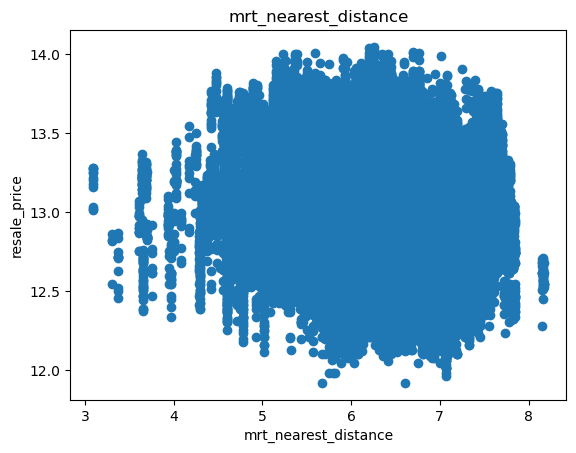

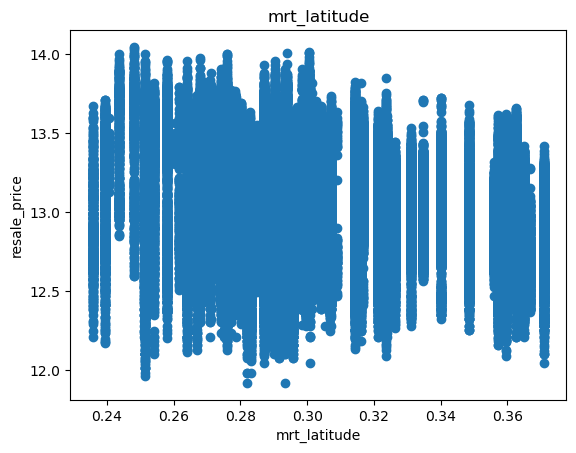

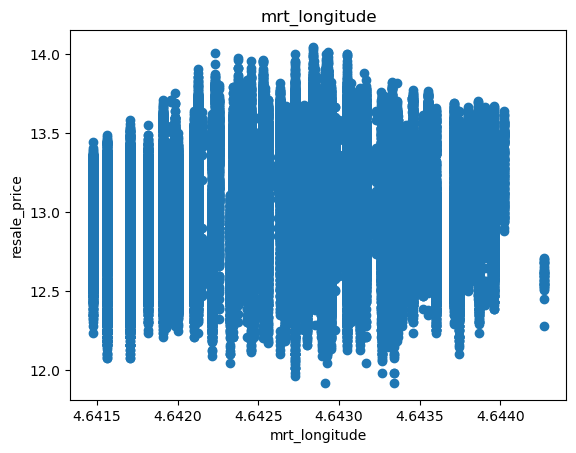

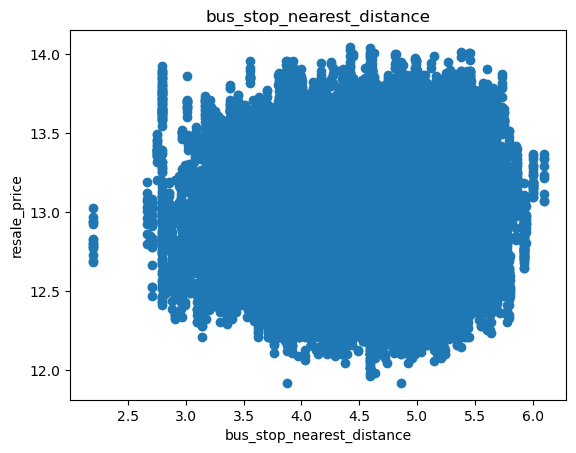

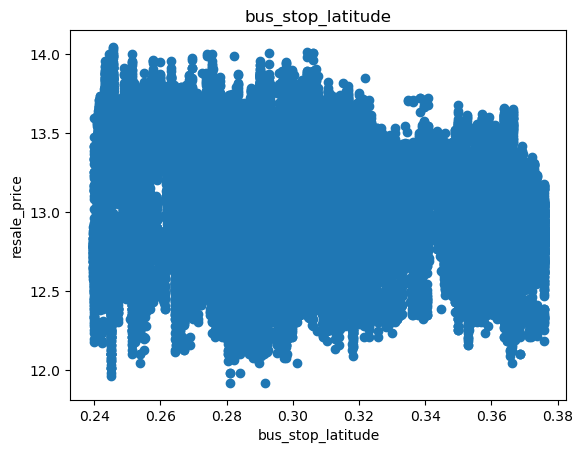

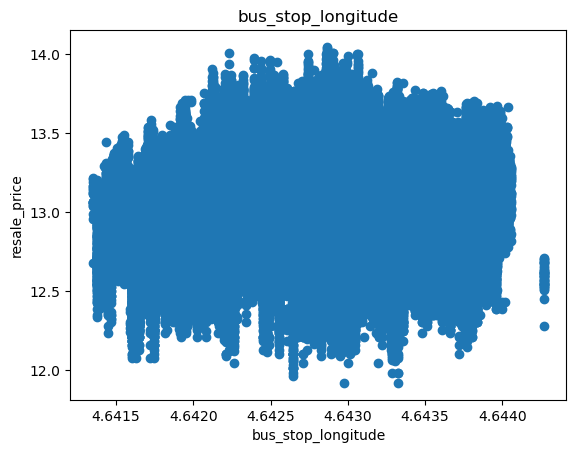

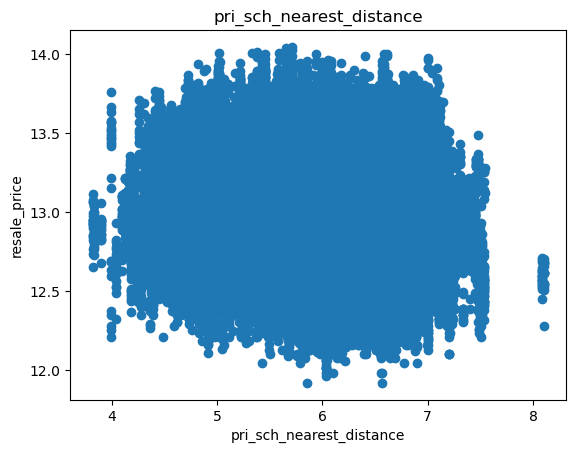

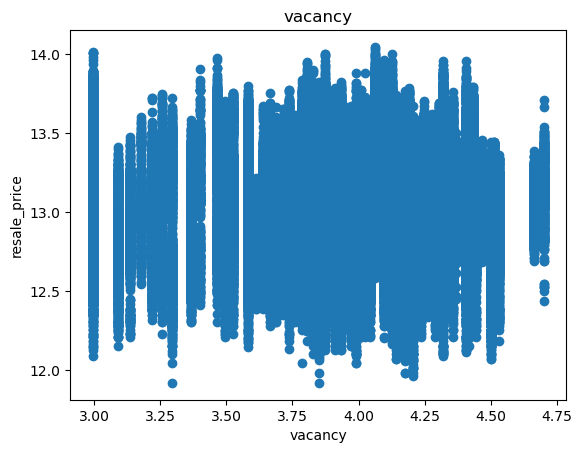

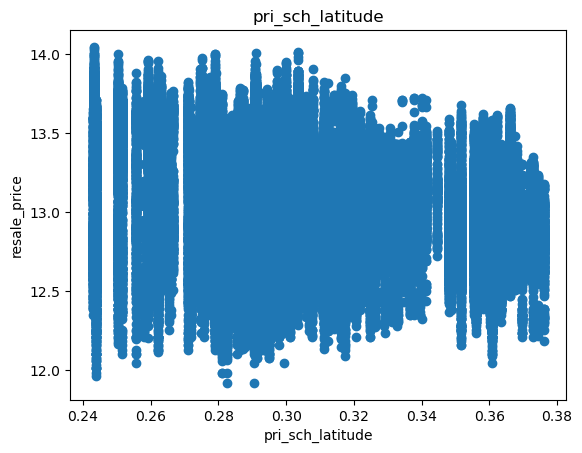

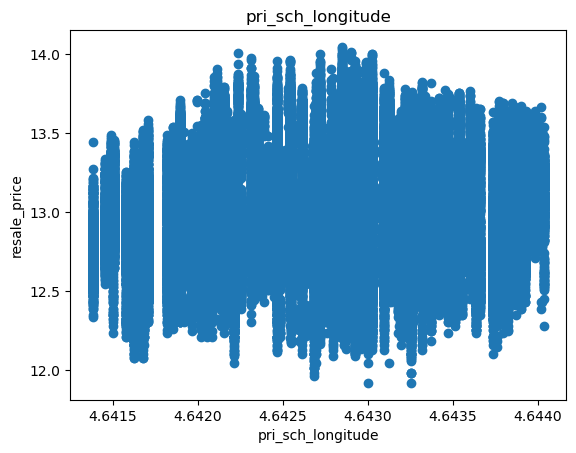

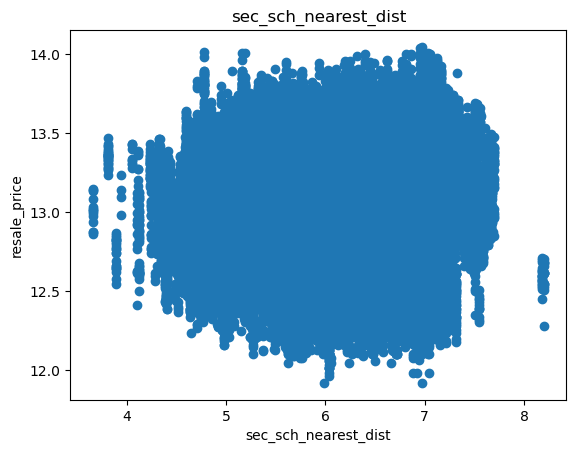

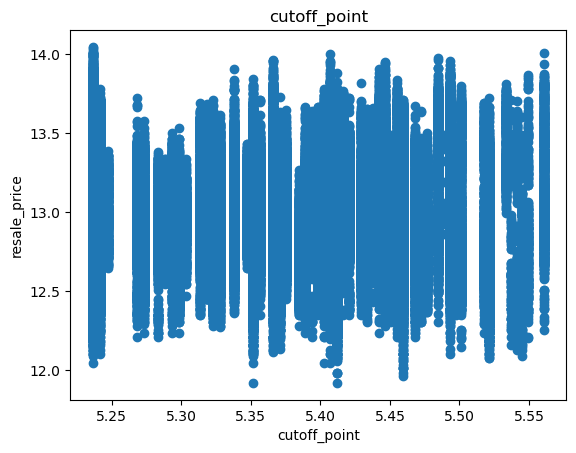

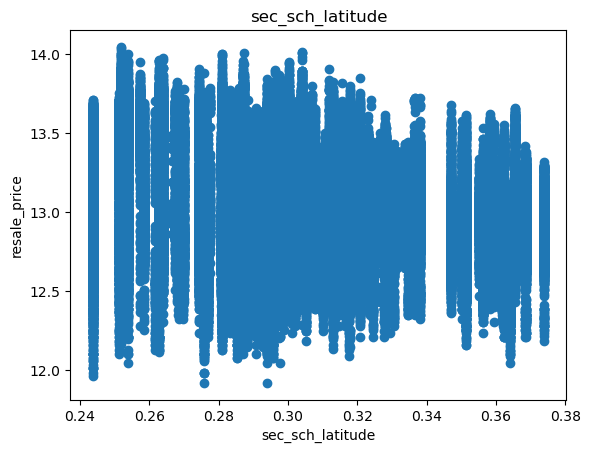

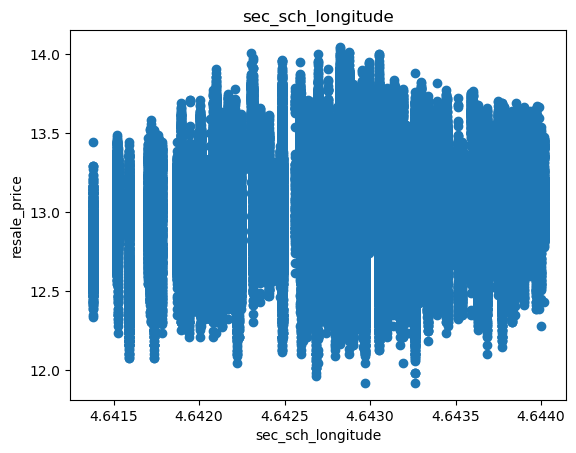

In [57]:
# transform data with logarithmic transformation

for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['resale_price']=np.log(data['resale_price'])
        plt.scatter(data[feature], data['resale_price'])
        plt.xlabel(feature)
        plt.ylabel('resale_price')
        plt.title(feature)
        plt.show()

#### Outliers

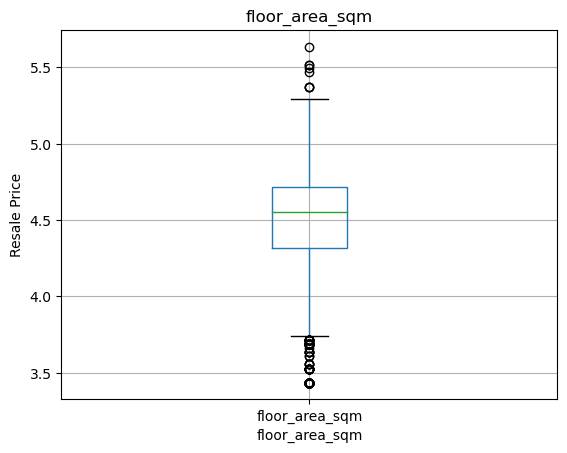

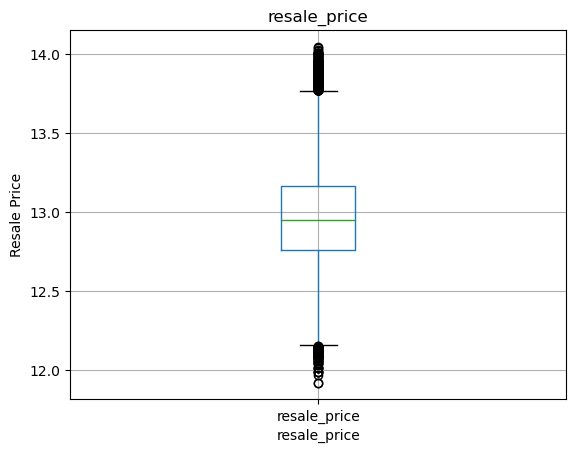

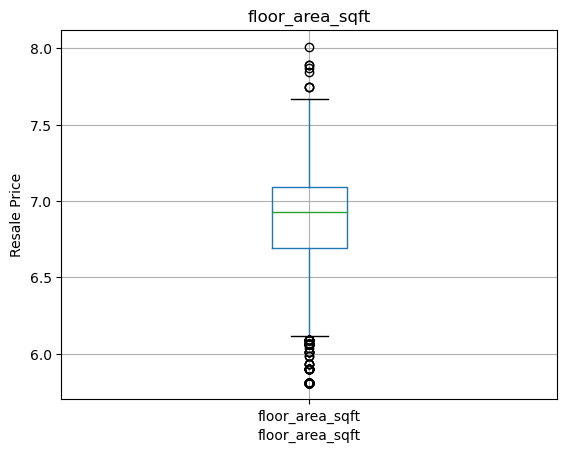

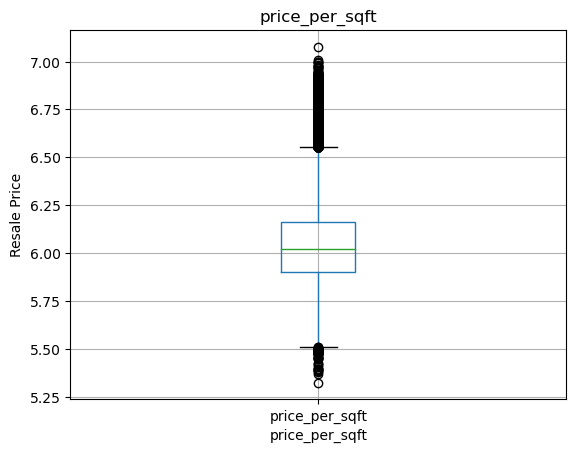

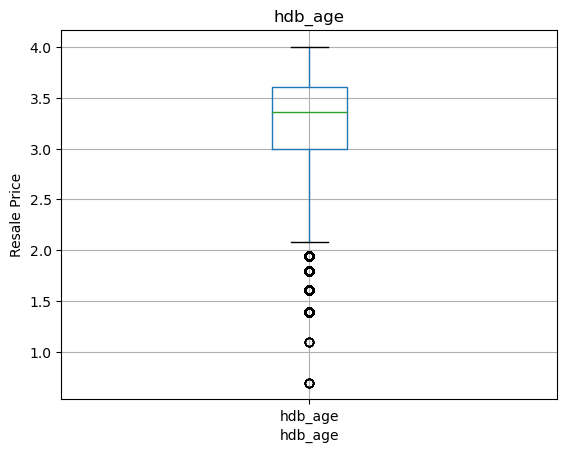

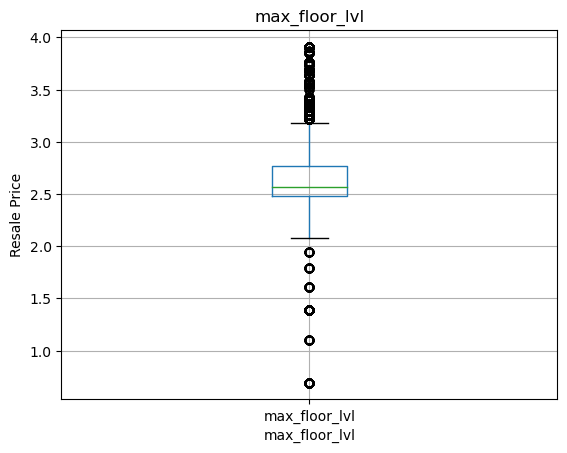

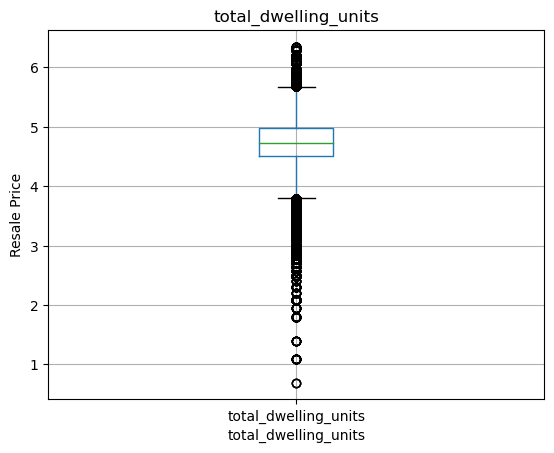

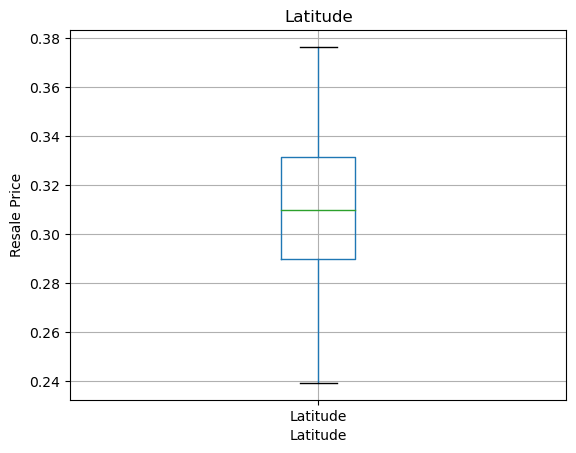

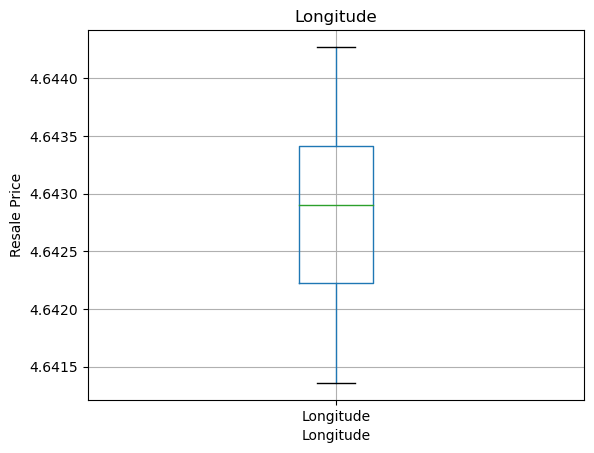

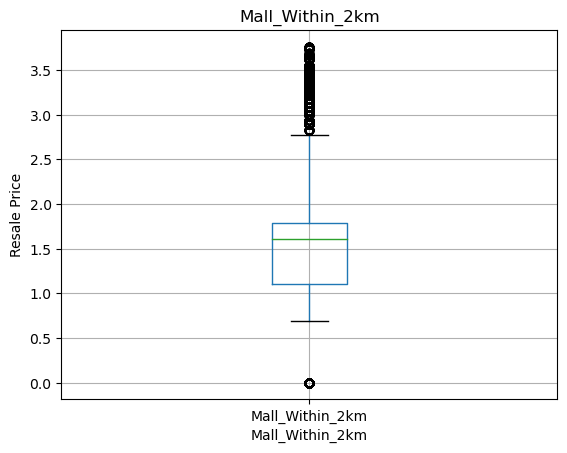

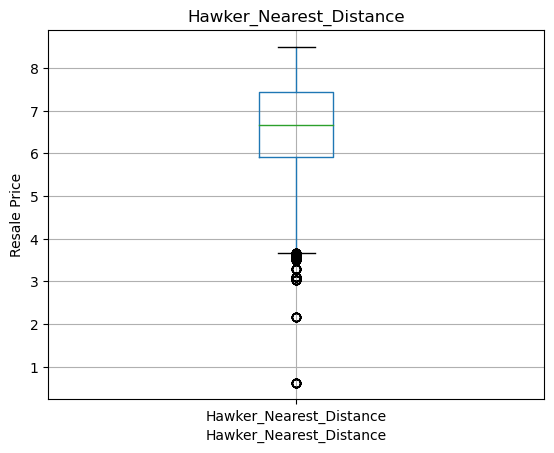

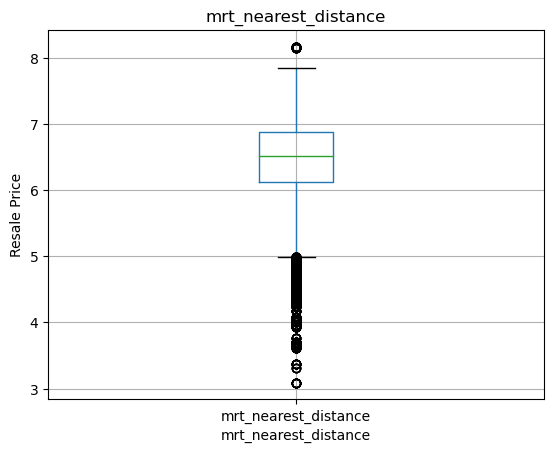

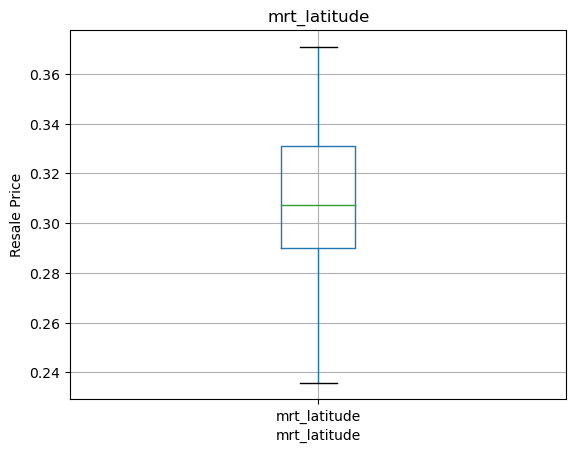

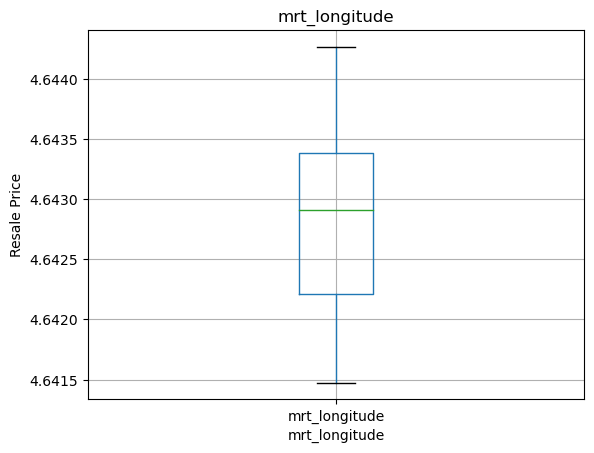

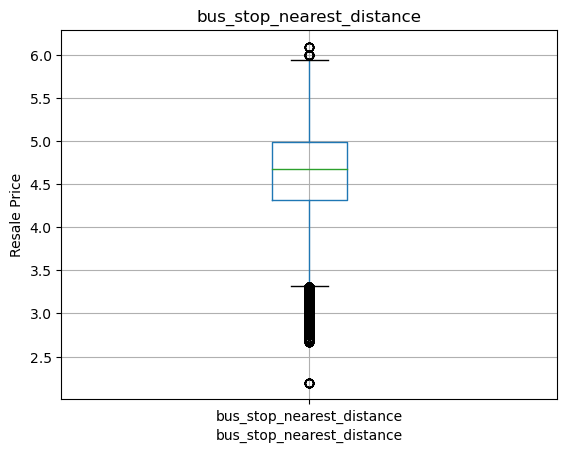

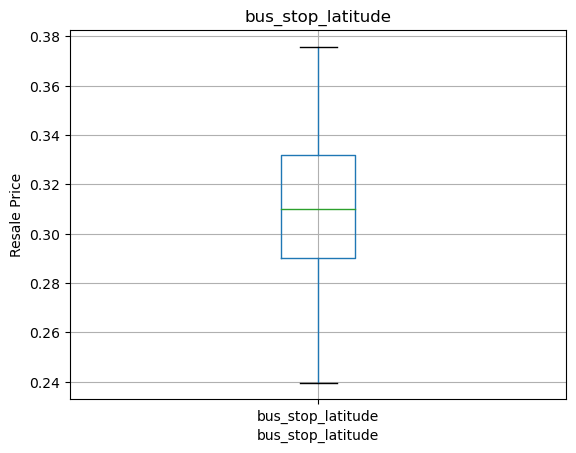

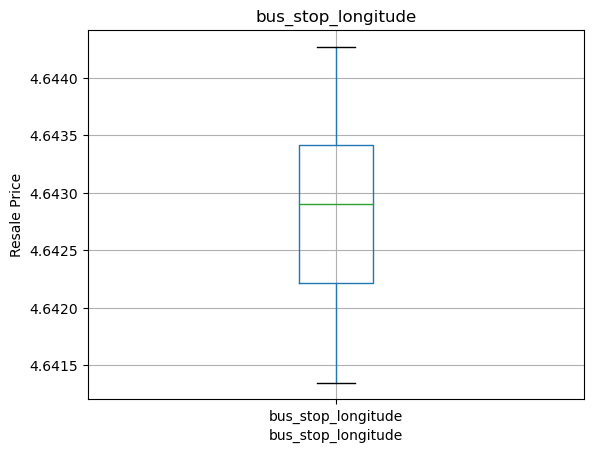

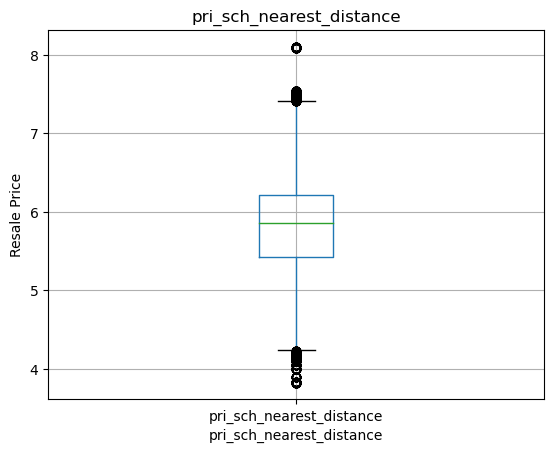

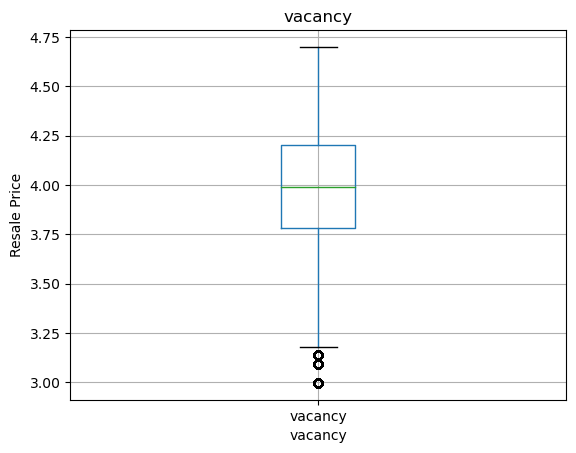

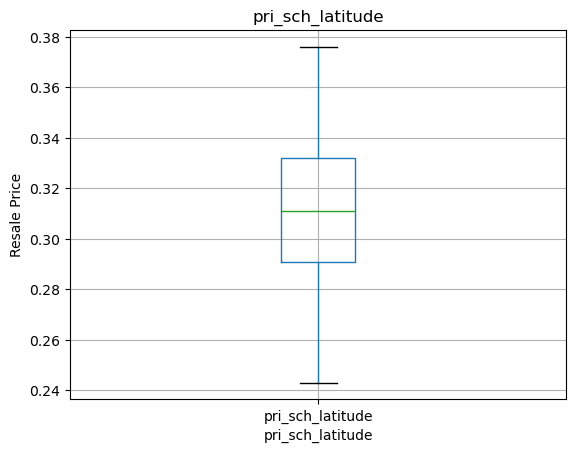

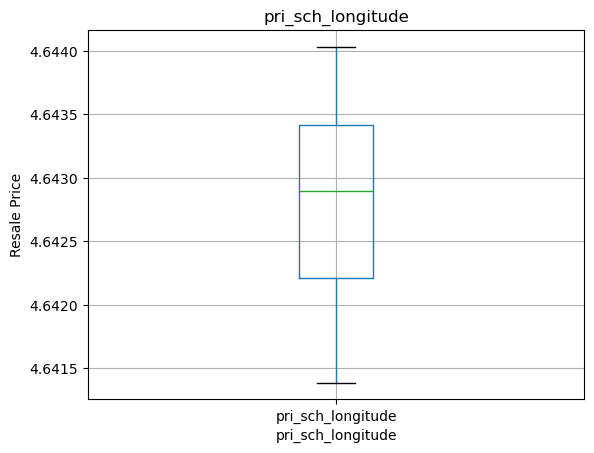

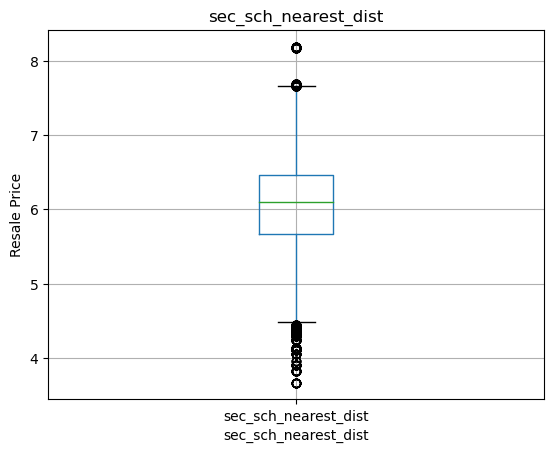

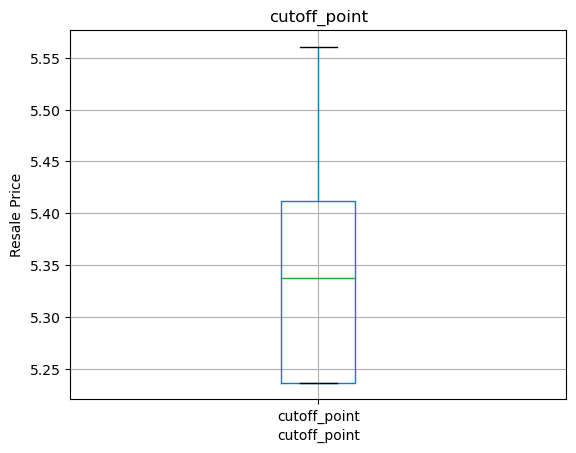

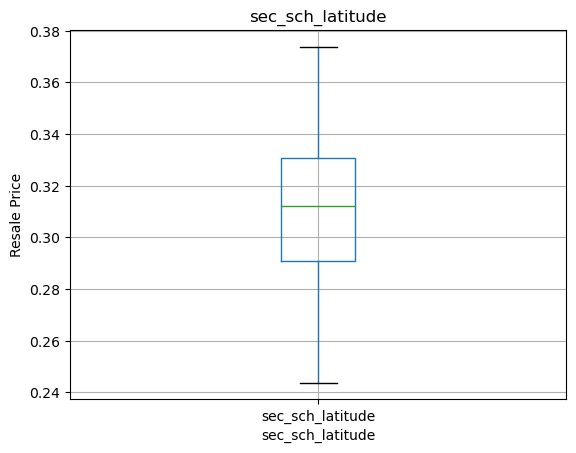

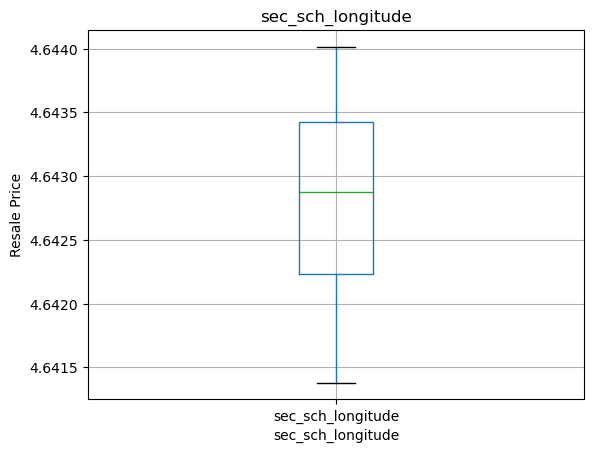

In [60]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel('Resale Price')
        plt.title(feature)
        plt.show()

### Categorical Variables

In [62]:
categorical_features=[feature for feature in df.columns if data[feature].dtype=='O']
categorical_features

['Tranc_YearMonth',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'flat_model',
 'full_flat_type',
 'address',
 'residential',
 'commercial',
 'market_hawker',
 'multistorey_carpark',
 'precinct_pavilion',
 'postal',
 'planning_area',
 'mrt_name',
 'bus_stop_name',
 'pri_sch_name',
 'sec_sch_name']

In [64]:
df[categorical_features].head()

Tranc_YearMonth             town  flat_type block       street_name  \
0         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  flat_model       full_flat_type               address  \
0     10 TO 12     Model A       4 ROOM Model A  3B, UPP BOON KENG RD   
1     07 TO 09    Improved      5 ROOM Improved     153, BISHAN ST 13   
2     13 TO 15   Apartment  EXECUTIVE Apartment  289B, BT BATOK ST 25   
3     01 TO 05     Model A       4 ROOM Model A     232, BISHAN ST 22   
4     01 TO 03  Simplified    4 ROOM Simplified     876, YISHUN ST 81   

  residential commercial market_hawker multistorey_carpark precinct_pavilion  \
0           Y          N             N                   N                 N   
1           Y          N             N                   N                 N   
2           Y          N             N                   N                 N   
3           Y          Y             N                   N                 N   
4           Y          N             N                   N                 N   

   postal planning_area     mrt_name             bus_stop_name  \
0  382003       Kallang      Kallang                    Blk 3B   
1  570153        Bishan       Bishan              BLK 151A MKT   
2  651289   Bukit Batok  Bukit Batok                  Blk 289E   
3  570232        Bishan       Bishan  Opp Bishan Nth Shop Mall   
4  760876        Yishun       Khatib                   Blk 873   

                            pri_sch_name  \
0               Geylang Methodist School   
1  Kuo Chuan Presbyterian Primary School   
2                  Keming Primary School   
3                   Catholic High School   
4              Naval Base Primary School   

                              sec_sch_name  
0                 Geylang Methodist School  
1  Kuo Chuan Presbyterian Secondary School  
2             Yusof Ishak Secondary School  
3                     Catholic High School  
4             Orchid Park Secondary School

In [67]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Tranc_YearMonth and number of categories are 110
The feature is town and number of categories are 26
The feature is flat_type and number of categories are 7
The feature is block and number of categories are 2514
The feature is street_name and number of categories are 553
The feature is storey_range and number of categories are 25
The feature is flat_model and number of categories are 20
The feature is full_flat_type and number of categories are 43
The feature is address and number of categories are 9157
The feature is residential and number of categories are 1
The feature is commercial and number of categories are 2
The feature is market_hawker and number of categories are 2
The feature is multistorey_carpark and number of categories are 2
The feature is precinct_pavilion and number of categories are 2
The feature is postal and number of categories are 17483
The feature is planning_area and number of categories are 32
The feature is mrt_name and number of categories are 

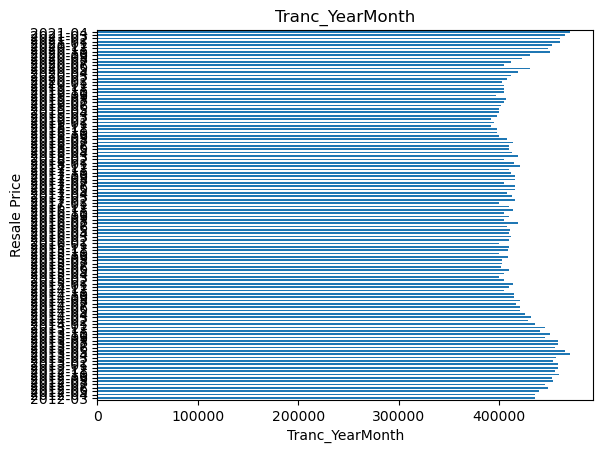

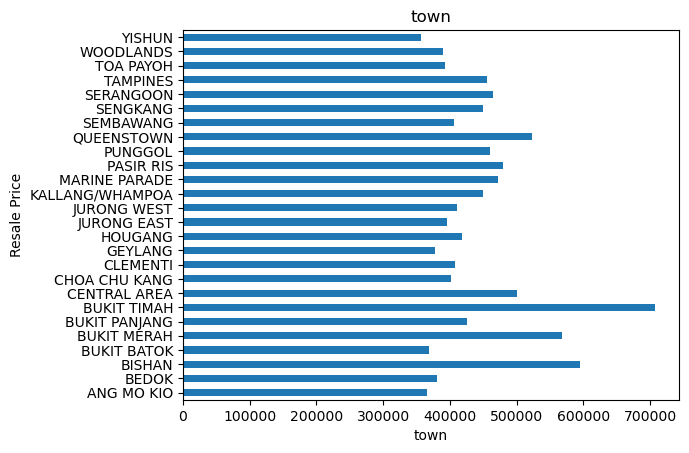

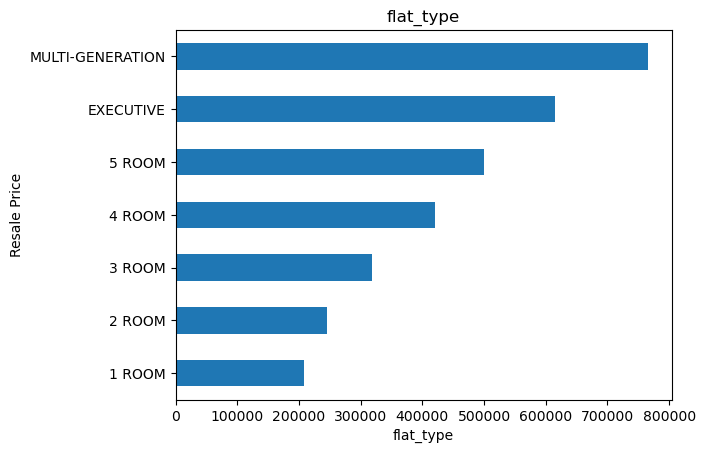

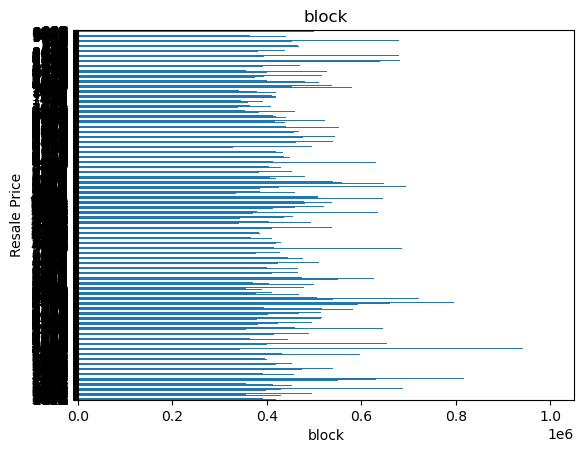

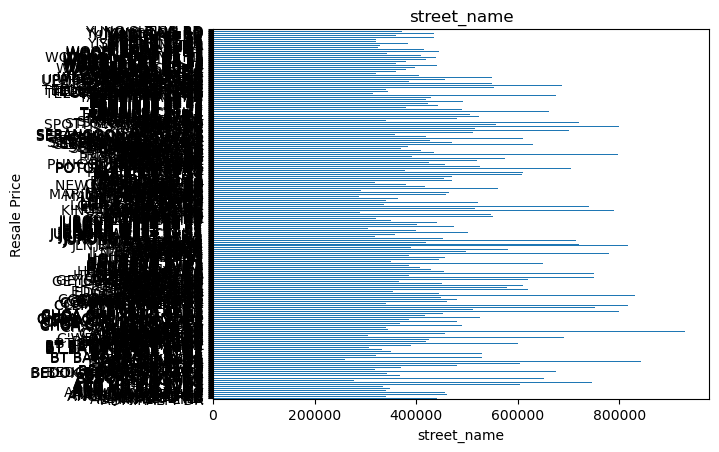

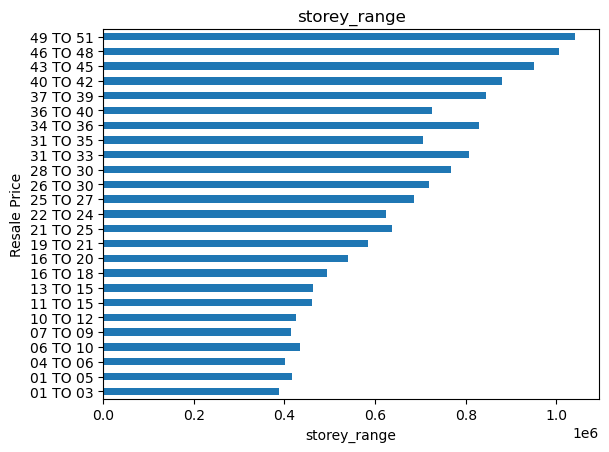

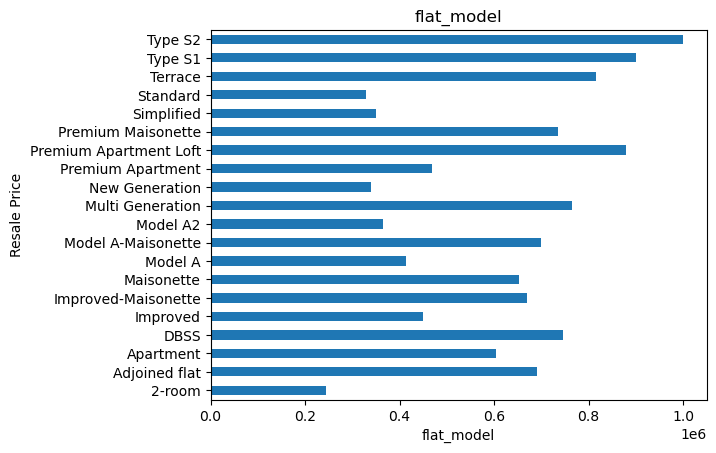

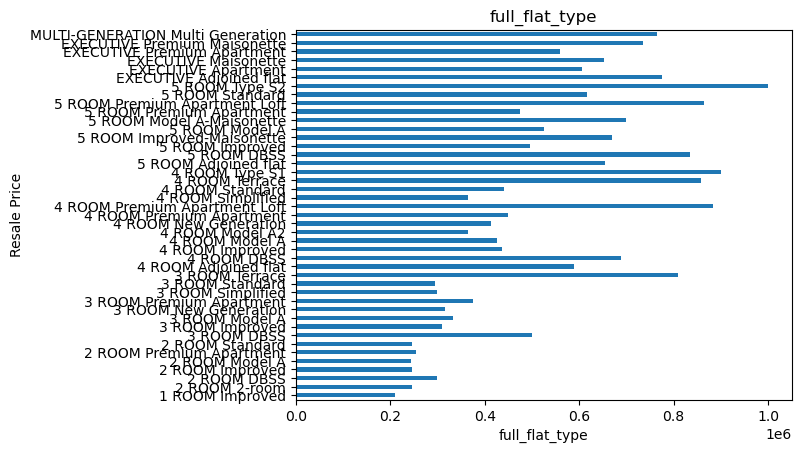

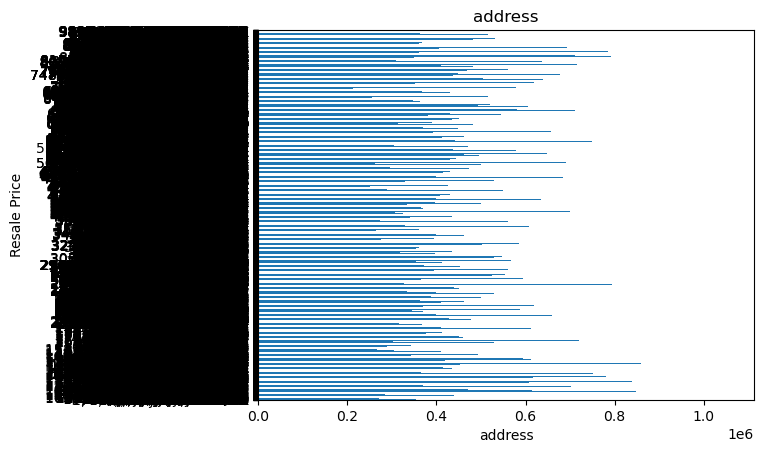

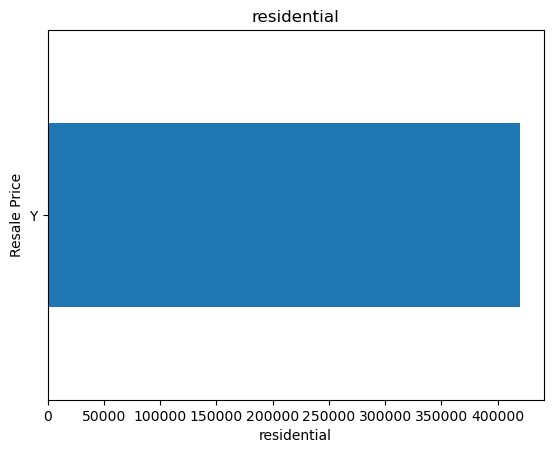

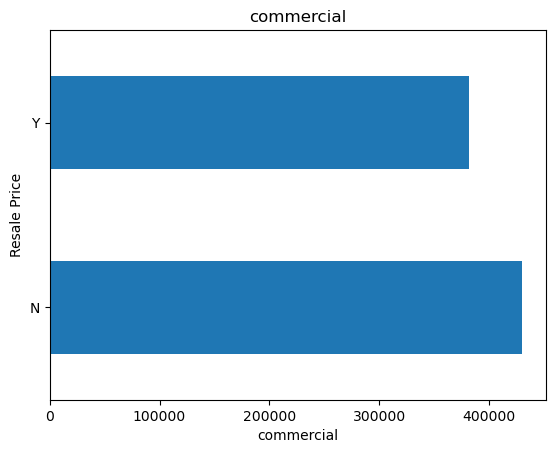

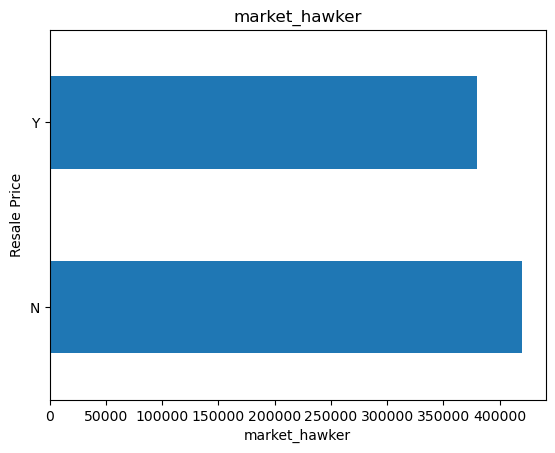

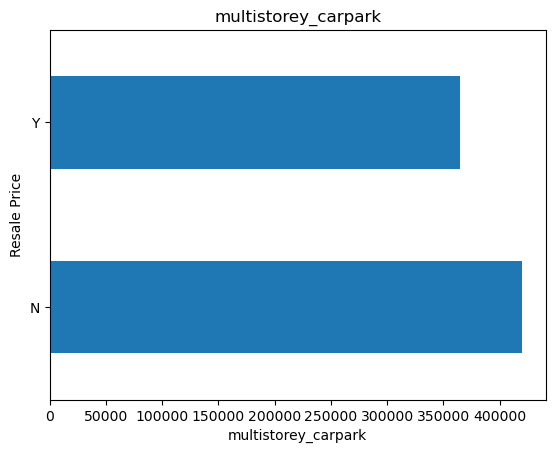

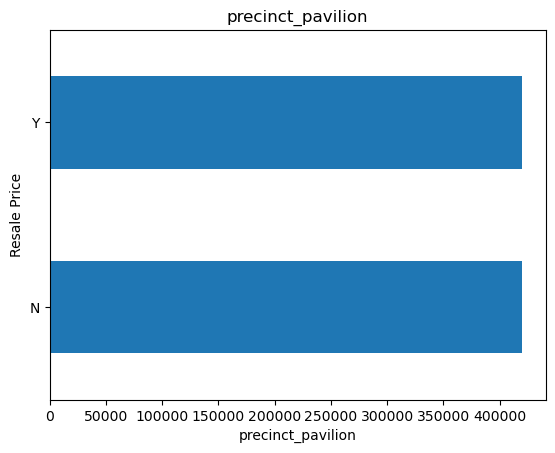

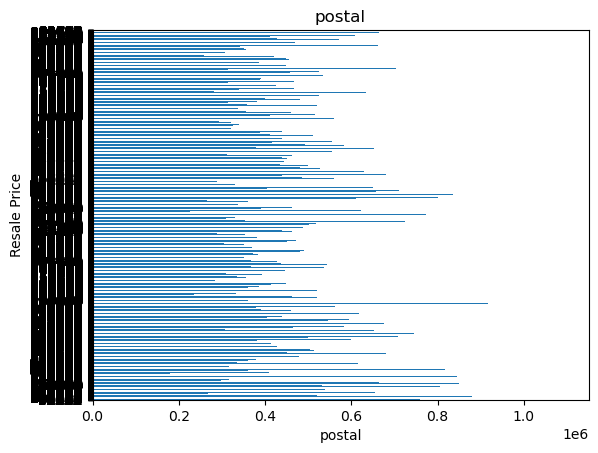

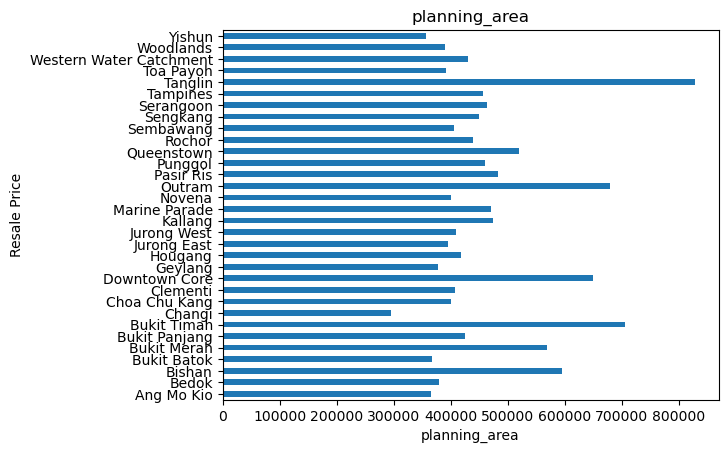

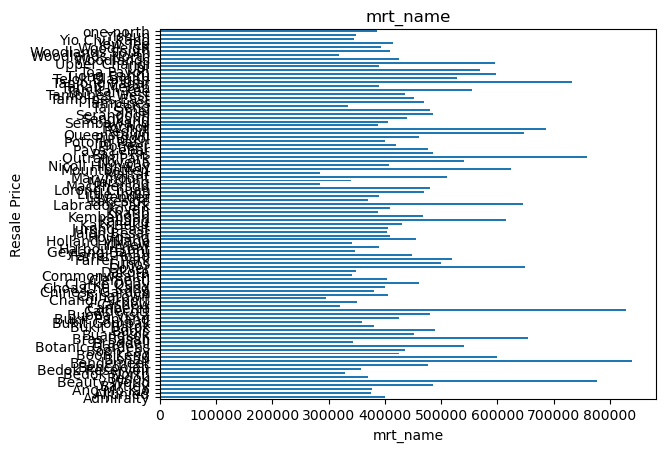

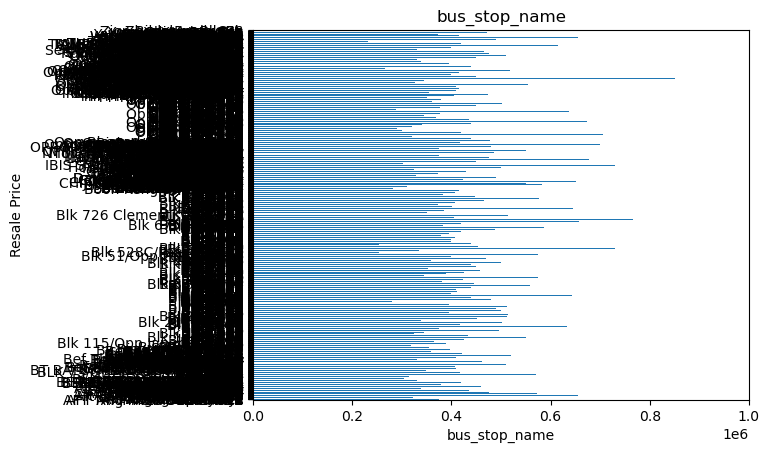

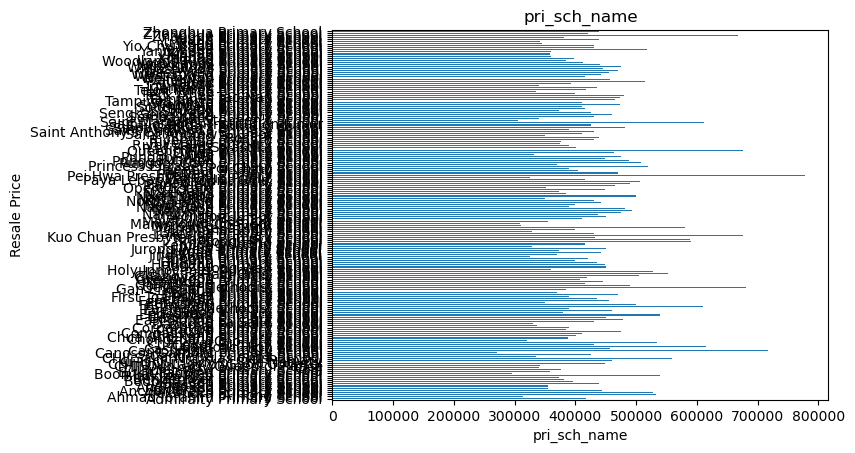

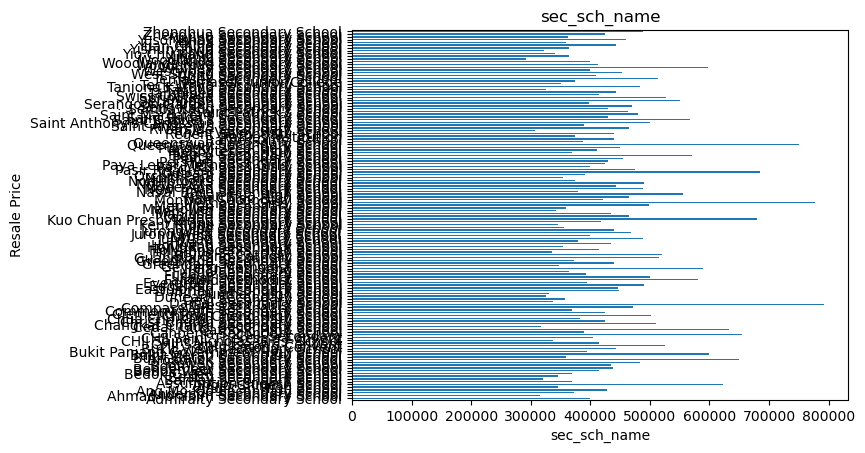

In [70]:
# find out relationship between categorical values and sales price
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['resale_price'].median().plot.barh()
    plt.xlabel(feature)
    plt.ylabel('Resale Price')
    plt.title(feature)
    plt.show()

<AxesSubplot: >

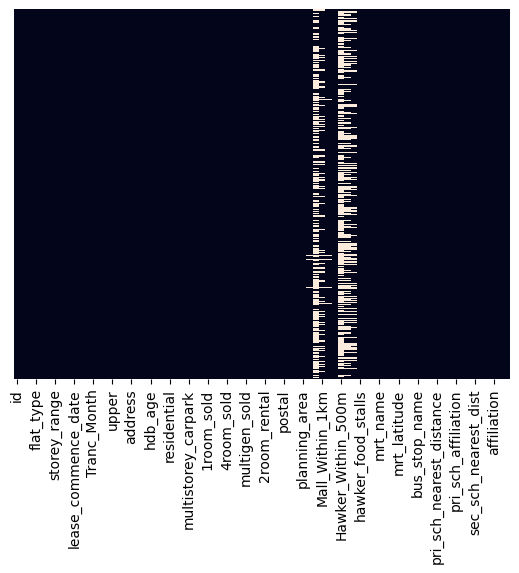

In [32]:
# visualize missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# from the heatmap, mall_within_1km and hawker_within_500m has the most number of null values

In [14]:
df.shape

(150634, 78)

In [ ]:
# find out the suitable values to fill in

In [22]:
df['Mall_Within_1km'].mean()

2.1496230272826016

In [18]:
df['Mall_Within_1km'].mode()

0    1.0
Name: Mall_Within_1km, dtype: float64

In [23]:
df['Mall_Within_1km'].median()

2.0

In [24]:
# safer to make the assumption that there is 1 mall within 1km of Singapore (rather than 2, or 2.14)

In [25]:
# fill na for mall_within_1km
df['Mall_Within_1km'] = df['Mall_Within_1km'].fillna(df['Mall_Within_1km'].mode())